In [2]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [3]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [6]:
ls -d */

experiment_result//  OldGammaTileCode//  sample//       Vision-stuff//
final_run//          pixel_em//          uniqueTiles//


In [9]:
ls uniqueTiles/10workers_rand0/worker1.pkl

uniqueTiles/10workers_rand0/worker1.pkl


In [7]:
ls uniqueTiles/10workers_rand0/indMat1.pkl

uniqueTiles/10workers_rand0/indMat1.pkl


In [53]:
batch = "10workers_rand0"
objid = 1
worker_lst = pkl.load(open("uniqueTiles/{}/worker{}.pkl".format(batch,objid)))
indMat = pkl.load(open("uniqueTiles/{}/indMat{}.pkl".format(batch,objid)))

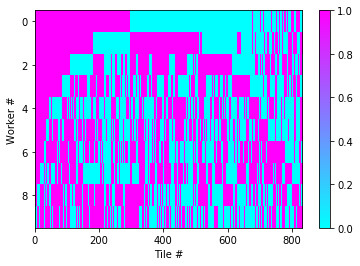

In [54]:
plt.ylabel("Worker #")
plt.xlabel("Tile #")
plt.imshow(indMat[:-1],cmap="cool",interpolation='none', aspect='auto')
plt.colorbar()

In [55]:
worker_keys,tidxs = np.where(indMat[:-1]!=0)

In [45]:
# [batch, objid, workerID, tileID, tile area, tile overlap with GT]

In [114]:
Tile_PR = pd.read_csv("Tile_PR_all.csv",index_col=0)

In [133]:
computed_GT_info =  pd.read_csv("../computed_my_COCO_BBvals.csv",index_col=0)

In [147]:
keys=['Num Points','Area Ratio','Precision [Self]','Recall [Self]','Jaccard [Self]','TPR [Self]','FNR [Self]','TNR [Self]', 'FPR [Self]']

In [250]:
worker_tbl = []
Tile_PR_keys = ['P [MVT]', 'R [MVT]','J [MVT]']
GT_info_keys = ['Num Points','Area Ratio','Precision [Self]','Recall [Self]','Jaccard [Self]','TPR [Self]','FNR [Self]','TNR [Self]', 'FPR [Self]']

for objid in object_lst:
    worker_lst = pkl.load(open("uniqueTiles/{}/worker{}.pkl".format(batch,objid)))
    indMat = pkl.load(open("uniqueTiles/{}/indMat{}.pkl".format(batch,objid)))
#         worker_keys,tidxs = np.where(indMat[:-1]!=0)
    for worker_id in worker_lst:
        try:
            numPts,area_ratio, P,R,J,TPR,FNR,TNR,FPR = computed_GT_info[(computed_GT_info["object_id"]==objid)&(computed_GT_info["worker_id"]==worker_id)][GT_info_keys].values[0]
        except(IndexError):
#                 print "skipped object2 ",objid, Nworker,batch_num
            pass
        worker_tbl.append([objid,worker_id,numPts,area_ratio, P,R,J,TPR,FNR,TNR,FPR])
worker_tbl = pd.DataFrame(worker_tbl,columns=["objid","worker id",'Num Points','Area Ratio','P [GT]','R [GT]','J [GT]','TPR [GT]','FNR [GT]','TNR [GT]', 'FPR [GT]'])


In [251]:
worker_tbl[(worker_tbl["worker id"]==196)&(worker_tbl["objid"]==1)]

,objid,worker id,Num Points,Area Ratio,P [GT],R [GT],J [GT],TPR [GT],FNR [GT],TNR [GT],FPR [GT]
8,1,196,67,0.087782,0.935739,0.977213,0.915757,0.977213,0.067109,0.993841,0.006159


In [288]:
worker_tbl.to_csv("all_worker_response_info.csv")

In [297]:
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]
tile_tbl =[]
for batch in ['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0']:
    for objid in object_lst:
        vtiles = pkl.load(open("uniqueTiles/{}/vtiles{}.pkl".format(batch,objid)))
        for tidx in range(len(vtiles)):
            tile = vtiles[tidx]
            gt = ground_truth_T(objid)
            try:
                if tile.intersects(gt):
                    overlap_area  = intersection_area(tile,gt)
                else:
                    overlap_area  = 0
            except(shapely.geos.TopologicalError):
                overlap_area=-1
            tarea = tile.area
            tile_tbl.append([batch,objid,tidx,tarea,overlap_area])

TopologyException: found non-noded intersection between LINESTRING (205 320, 207 322.333) and LINESTRING (213.471 318.412, 206.149 321.34) at 206.14893617021278 321.34042553191489
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (205 320, 207 322.333) and LINESTRING (213.471 318.412, 206.149 321.34) at 206.14893617021278 321.34042553191489
TopologyException: found non-noded intersection between LINESTRING (205 320, 207 322.333) and LINESTRING (213.471 318.412, 206.149 321.34) at 206.14893617021278 321.34042553191489
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (205 320, 207 322.333) and LINESTRING (213.471 318.412, 206.149 321.34) at 206.14893617021278 321.34042553191489
TopologyException: found non-noded intersection between LINESTRING (261.933 347.6, 262.25 344.75) and LINESTRING (262 347, 262 345) at 262 347.00000000000006
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRIN

TopologyException: found non-noded intersection between LINESTRING (505.2 201.4, 502.556 201.778) and LINESTRING (502.333 202.667, 504.333 201.524) at 504.33333333333337 201.52380952380952
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (505.2 201.4, 502.556 201.778) and LINESTRING (502.333 202.667, 504.333 201.524) at 504.33333333333337 201.52380952380952
TopologyException: found non-noded intersection between LINESTRING (505.2 201.4, 502.556 201.778) and LINESTRING (502.333 202.667, 504.333 201.524) at 504.33333333333337 201.52380952380952
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (505.2 201.4, 502.556 201.778) and LINESTRING (502.333 202.667, 504.333 201.524) at 504.33333333333337 201.52380952380952
TopologyException: found non-noded intersection between LINESTRING (500.538 203.692, 498.316 211.842) and LINESTRING (498.517 211.103, 498.648 211.045) at 498.51724137931035 211.10344827586206
ERROR:shapely

TopologyException: found non-noded intersection between LINESTRING (258 224, 258.333 221.667) and LINESTRING (258.148 222.966, 257.28 223.482) at 258.14767932489451 222.96624472573839
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (258 224, 258.333 221.667) and LINESTRING (258.148 222.966, 257.28 223.482) at 258.14767932489451 222.96624472573839
TopologyException: found non-noded intersection between LINESTRING (258 224, 258.333 221.667) and LINESTRING (258.148 222.966, 257.28 223.482) at 258.14767932489451 222.96624472573839
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (258 224, 258.333 221.667) and LINESTRING (258.148 222.966, 257.28 223.482) at 258.14767932489451 222.96624472573839
TopologyException: found non-noded intersection between LINESTRING (432 225, 424.385 226.154) and LINESTRING (424.385 226.154, 440 224) at 424.38461538461689 226.15384615384593
ERROR:shapely.geos:TopologyException: found non-n

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (477.477 200.913, 481.251 200.691) and LINESTRING (479.158 198.263, 480.636 200.727) at 480.63636363636363 200.72727272727272
TopologyException: side location conflict at 482.68275862068964 200.60689655172413
ERROR:shapely.geos:TopologyException: side location conflict at 482.68275862068964 200.60689655172413
TopologyException: side location conflict at 482.68275862068964 200.60689655172413
ERROR:shapely.geos:TopologyException: side location conflict at 482.68275862068964 200.60689655172413
TopologyException: found non-noded intersection between LINESTRING (420.359 272.159, 421.4 276.2) and LINESTRING (420.938 274.407, 420.359 272.159) at 420.54713025520789 272.88886627481935
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (420.359 272.159, 421.4 276.2) and LINESTRING (420.938 274.407, 420.359 272.159) at 420.54713025520789 272.88886627481935
TopologyException: fo

TopologyException: found non-noded intersection between LINESTRING (51.3462 178.538, 55.8333 183.667) and LINESTRING (54.725 182.4, 55.5455 183.091) at 54.724999999999987 182.39999999999998
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (51.3462 178.538, 55.8333 183.667) and LINESTRING (54.725 182.4, 55.5455 183.091) at 54.724999999999987 182.39999999999998
TopologyException: found non-noded intersection between LINESTRING (2.48312 223.104, 0.99435 221.243) and LINESTRING (1.30824 224.625, 1.40599 221.757) at 1.4059945504087197 221.7574931880109
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (2.48312 223.104, 0.99435 221.243) and LINESTRING (1.30824 224.625, 1.40599 221.757) at 1.4059945504087197 221.7574931880109
TopologyException: found non-noded intersection between LINESTRING (2.48312 223.104, 0.99435 221.243) and LINESTRING (1.30824 224.625, 1.40599 221.757) at 1.4059945504087197 221.7574931880109
ERROR:

TopologyException: found non-noded intersection between LINESTRING (554 76, 549.091 79.5065) and LINESTRING (549.484 79.2258, 550 80) at 549.48387096774195 79.225806451612911
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (554 76, 549.091 79.5065) and LINESTRING (549.484 79.2258, 550 80) at 549.48387096774195 79.225806451612911
TopologyException: found non-noded intersection between LINESTRING (554 76, 549.091 79.5065) and LINESTRING (549.484 79.2258, 550 80) at 549.48387096774195 79.225806451612911
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (554 76, 549.091 79.5065) and LINESTRING (549.484 79.2258, 550 80) at 549.48387096774195 79.225806451612911
TopologyException: found non-noded intersection between LINESTRING (444.167 99.6667, 480 118) and LINESTRING (444.167 99.6667, 478.587 117.783) at 444.16666666666561 99.666666666666103
ERROR:shapely.geos:TopologyException: found non-noded intersection between LI

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (102 90, 104.824 57.0588) and LINESTRING (104.333 58.3333, 104.631 59.3017) at 104.63128491620111 59.301675977653623
TopologyException: found non-noded intersection between LINESTRING (28.1818 85.7273, 33 83.8) and LINESTRING (31.4286 84.4286, 30.2 83.2) at 31.428571428571427 84.428571428571431
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (28.1818 85.7273, 33 83.8) and LINESTRING (31.4286 84.4286, 30.2 83.2) at 31.428571428571427 84.428571428571431
TopologyException: found non-noded intersection between LINESTRING (28.1818 85.7273, 33 83.8) and LINESTRING (31.4286 84.4286, 30.2 83.2) at 31.428571428571427 84.428571428571431
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (28.1818 85.7273, 33 83.8) and LINESTRING (31.4286 84.4286, 30.2 83.2) at 31.428571428571427 84.428571428571431
TopologyException: found non-noded intersec

TopologyException: found non-noded intersection between LINESTRING (216 276, 217.97 268.121) and LINESTRING (217 288, 218.199 263.427) at 217.96969696969697 268.12121212121212
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (216 276, 217.97 268.121) and LINESTRING (217 288, 218.199 263.427) at 217.96969696969697 268.12121212121212
TopologyException: found non-noded intersection between LINESTRING (216 276, 217.97 268.121) and LINESTRING (217 288, 218.199 263.427) at 217.96969696969697 268.12121212121212
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (216 276, 217.97 268.121) and LINESTRING (217 288, 218.199 263.427) at 217.96969696969697 268.12121212121212
TopologyException: found non-noded intersection between LINESTRING (273 390, 279.111 390.278) and LINESTRING (279.111 390.278, 258 385) at 279.11111111111114 390.27777777777777
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINEST

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (425.789 308.684, 422.5 297.5) and LINESTRING (425.529 306.588, 421.935 295.804) at 422.49999999999989 297.49999999999966
TopologyException: found non-noded intersection between LINESTRING (546.423 392.102, 553.621 391.155) and LINESTRING (553.621 391.155, 550.377 391.582) at 551.39863609091833 391.4475478827739
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (546.423 392.102, 553.621 391.155) and LINESTRING (553.621 391.155, 550.377 391.582) at 551.39863609091833 391.4475478827739
TopologyException: found non-noded intersection between LINESTRING (546.423 392.102, 553.621 391.155) and LINESTRING (553.621 391.155, 550.377 391.582) at 551.39863609091833 391.4475478827739
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (546.423 392.102, 553.621 391.155) and LINESTRING (553.621 391.155, 550.377 391.582) at 551.39863609091833 391.

TopologyException: found non-noded intersection between LINESTRING (515 224, 521.288 223.102) and LINESTRING (520 223.286, 516.4 223.8) at 518.03223439437829 223.56682365794595
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (515 224, 521.288 223.102) and LINESTRING (520 223.286, 516.4 223.8) at 518.03223439437829 223.56682365794595
TopologyException: found non-noded intersection between LINESTRING (551.263 301.316, 552.75 308.75) and LINESTRING (552 300.333, 552 305) at 552 305
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (551.263 301.316, 552.75 308.75) and LINESTRING (552 300.333, 552 305) at 552 305
TopologyException: found non-noded intersection between LINESTRING (551.263 301.316, 552.75 308.75) and LINESTRING (552 300.333, 552 305) at 552 305
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (551.263 301.316, 552.75 308.75) and LINESTRING (552 300.333, 552 305) at 5

TopologyException: found non-noded intersection between LINESTRING (167.46 151.071, 169 129) and LINESTRING (168 143.333, 167.535 150) at 167.75133946791033 146.89746762661863
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (167.46 151.071, 169 129) and LINESTRING (168 143.333, 167.535 150) at 167.75133946791033 146.89746762661863
TopologyException: found non-noded intersection between LINESTRING (323.435 148.652, 321 149.667) and LINESTRING (329 147, 321 149.667) at 320.99999999999989 149.66666666666669
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (323.435 148.652, 321 149.667) and LINESTRING (329 147, 321 149.667) at 320.99999999999989 149.66666666666669
TopologyException: found non-noded intersection between LINESTRING (323.435 148.652, 321 149.667) and LINESTRING (329 147, 321 149.667) at 320.99999999999989 149.66666666666669
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINE

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (239.03 334.606, 238.312 332.094) and LINESTRING (237 332, 238.465 332.628) at 238.46511627906978 332.62790697674421
TopologyException: found non-noded intersection between LINESTRING (239.03 334.606, 238.312 332.094) and LINESTRING (237 332, 238.465 332.628) at 238.46511627906978 332.62790697674421
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (239.03 334.606, 238.312 332.094) and LINESTRING (237 332, 238.465 332.628) at 238.46511627906978 332.62790697674421
TopologyException: found non-noded intersection between LINESTRING (245.75 417.375, 246.333 416.889) and LINESTRING (246.333 416.889, 245.8 417.333) at 246.07219827586212 417.10650143678163
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (245.75 417.375, 246.333 416.889) and LINESTRING (246.333 416.889, 245.8 417.333) at 246.07219827586212 417.10650143678163
TopologyExc

TopologyException: found non-noded intersection between LINESTRING (368.44 146.284, 369.536 145.108) and LINESTRING (369.527 145.2, 369.938 140.688) at 369.53562653562653 145.10810810810813
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (368.44 146.284, 369.536 145.108) and LINESTRING (369.527 145.2, 369.938 140.688) at 369.53562653562653 145.10810810810813
TopologyException: found non-noded intersection between LINESTRING (368.44 146.284, 369.536 145.108) and LINESTRING (369.527 145.2, 369.938 140.688) at 369.53562653562653 145.10810810810813
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (368.44 146.284, 369.536 145.108) and LINESTRING (369.527 145.2, 369.938 140.688) at 369.53562653562653 145.10810810810813
TopologyException: found non-noded intersection between LINESTRING (364.913 173.235, 362.872 164.663) and LINESTRING (362.872 164.663, 364.948 163.18) at 362.87209302325579 164.66279069767444
ERROR:shap

TopologyException: found non-noded intersection between LINESTRING (365.268 202.66, 380.627 216.157) and LINESTRING (378.348 214.155, 379.879 214.682) at 378.34833659491193 214.1545988258317
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (365.268 202.66, 380.627 216.157) and LINESTRING (378.348 214.155, 379.879 214.682) at 378.34833659491193 214.1545988258317
TopologyException: found non-noded intersection between LINESTRING (187.2 289, 215.206 282.635) and LINESTRING (206.112 284.702, 192.526 287.789) at 192.88186299081019 287.70866750208859
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (187.2 289, 215.206 282.635) and LINESTRING (206.112 284.702, 192.526 287.789) at 192.88186299081019 287.70866750208859
TopologyException: found non-noded intersection between LINESTRING (187.2 289, 215.206 282.635) and LINESTRING (206.112 284.702, 192.526 287.789) at 192.88186299081019 287.70866750208859
ERROR:shapely.geos:

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (394.786 234.214, 403.471 231.765) and LINESTRING (398.5 233.167, 400.174 232.609) at 398.50000000000011 233.16666666666663
TopologyException: found non-noded intersection between LINESTRING (394.786 234.214, 403.471 231.765) and LINESTRING (398.5 233.167, 400.174 232.609) at 398.50000000000011 233.16666666666663
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (394.786 234.214, 403.471 231.765) and LINESTRING (398.5 233.167, 400.174 232.609) at 398.50000000000011 233.16666666666663
TopologyException: found non-noded intersection between LINESTRING (391.107 289.893, 388.281 284.388) and LINESTRING (391.151 290.094, 390.588 288.882) at 390.58823529411762 288.88235294117652
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (391.107 289.893, 388.281 284.388) and LINESTRING (391.151 290.094, 390.588 288.882) at 390.58823529411762 288

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (511.471 207.588, 515.873 205.073) and LINESTRING (512.5 207, 515.444 205.037) at 512.50000000000011 206.99999999999989
TopologyException: found non-noded intersection between LINESTRING (480 198, 481.941 200.055) and LINESTRING (481.024 199.084, 482 198) at 481.02409638554218 199.0843373493976
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (480 198, 481.941 200.055) and LINESTRING (481.024 199.084, 482 198) at 481.02409638554218 199.0843373493976
TopologyException: found non-noded intersection between LINESTRING (480 198, 481.941 200.055) and LINESTRING (481.024 199.084, 482 198) at 481.02409638554218 199.0843373493976
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (480 198, 481.941 200.055) and LINESTRING (481.024 199.084, 482 198) at 481.02409638554218 199.0843373493976
TopologyException: found non-noded intersection betw

TopologyException: found non-noded intersection between LINESTRING (447.655 220.368, 447.472 219.146) and LINESTRING (449 219, 447.091 219.182) at 447.47183098591546 219.14553990610329
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (447.655 220.368, 447.472 219.146) and LINESTRING (449 219, 447.091 219.182) at 447.47183098591546 219.14553990610329
TopologyException: found non-noded intersection between LINESTRING (446.288 227.661, 445.714 229) and LINESTRING (445.714 229, 446 228.333) at 445.9524374976798 228.44431250541385
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (446.288 227.661, 445.714 229) and LINESTRING (445.714 229, 446 228.333) at 445.9524374976798 228.44431250541385
TopologyException: found non-noded intersection between LINESTRING (446.288 227.661, 445.714 229) and LINESTRING (445.714 229, 446 228.333) at 445.9524374976798 228.44431250541385
ERROR:shapely.geos:TopologyException: found non-node

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (105.638 165.234, 106.739 163.913) and LINESTRING (109 162.5, 106 164.375) at 106.73913043478262 163.91304347826087
TopologyException: found non-noded intersection between LINESTRING (105.638 165.234, 106.739 163.913) and LINESTRING (109 162.5, 106 164.375) at 106.73913043478262 163.91304347826087
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (105.638 165.234, 106.739 163.913) and LINESTRING (109 162.5, 106 164.375) at 106.73913043478262 163.91304347826087
TopologyException: found non-noded intersection between LINESTRING (209.127 173.509, 140.627 173.855) and LINESTRING (140.627 173.855, 209.127 173.509) at 196.63438001483942 173.57255363628869
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (209.127 173.509, 140.627 173.855) and LINESTRING (140.627 173.855, 209.127 173.509) at 196.63438001483942 173.57255363628869
Topology

TopologyException: found non-noded intersection between LINESTRING (382.284 125.975, 385.058 125.159) and LINESTRING (387.087 125.739, 383.872 124.821) at 385.05797101449275 125.15942028985506
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (382.284 125.975, 385.058 125.159) and LINESTRING (387.087 125.739, 383.872 124.821) at 385.05797101449275 125.15942028985506
TopologyException: found non-noded intersection between LINESTRING (382.284 125.975, 385.058 125.159) and LINESTRING (387.087 125.739, 383.872 124.821) at 385.05797101449275 125.15942028985506
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (382.284 125.975, 385.058 125.159) and LINESTRING (387.087 125.739, 383.872 124.821) at 385.05797101449275 125.15942028985506
TopologyException: found non-noded intersection between LINESTRING (384.703 124.216, 380.147 124.976) and LINESTRING (382.842 124.526, 383.872 124.821) at 382.84210526315792 124.526315789473

TopologyException: found non-noded intersection between LINESTRING (89 287, 88.4554 282.752) and LINESTRING (86.1078 278.387, 88.7669 285.182) at 88.766949152542367 285.18220338983048
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (89 287, 88.4554 282.752) and LINESTRING (86.1078 278.387, 88.7669 285.182) at 88.766949152542367 285.18220338983048
TopologyException: found non-noded intersection between LINESTRING (47.2222 174.444, 43 166) and LINESTRING (44.9016 173.016, 47.2222 174.444) at 47.222222222222207 174.44444444444443
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (47.2222 174.444, 43 166) and LINESTRING (44.9016 173.016, 47.2222 174.444) at 47.222222222222207 174.44444444444443
TopologyException: found non-noded intersection between LINESTRING (47.2222 174.444, 43 166) and LINESTRING (44.9016 173.016, 47.2222 174.444) at 47.222222222222207 174.44444444444443
ERROR:shapely.geos:TopologyException: foun

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (352.954 139.387, 355.564 140.769) and LINESTRING (354.455 139.818, 353.899 139.888) at 353.89887640449439 139.88764044943821
TopologyException: found non-noded intersection between LINESTRING (352.954 139.387, 355.564 140.769) and LINESTRING (354.455 139.818, 353.899 139.888) at 353.89887640449439 139.88764044943821
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (352.954 139.387, 355.564 140.769) and LINESTRING (354.455 139.818, 353.899 139.888) at 353.89887640449439 139.88764044943821
TopologyException: found non-noded intersection between LINESTRING (307.78 129.429, 306.308 139) and LINESTRING (308.154 131.846, 307.429 131.714) at 307.42857142857144 131.71428571428572
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (307.78 129.429, 306.308 139) and LINESTRING (308.154 131.846, 307.429 131.714) at 307.42857142857144 131.714

TopologyException: found non-noded intersection between LINESTRING (505 84, 499 88.5) and LINESTRING (499 88.5, 503.286 85.2857) at 499 88.5
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (505 84, 499 88.5) and LINESTRING (499 88.5, 503.286 85.2857) at 499 88.5
TopologyException: found non-noded intersection between LINESTRING (505 84, 499 88.5) and LINESTRING (499 88.5, 503.286 85.2857) at 499 88.5
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (505 84, 499 88.5) and LINESTRING (499 88.5, 503.286 85.2857) at 499 88.5
TopologyException: found non-noded intersection between LINESTRING (443.586 99.3609, 445.127 103.598) and LINESTRING (443.586 99.3609, 444.167 99.6667) at 443.58579881656806 99.360946745562146
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (443.586 99.3609, 445.127 103.598) and LINESTRING (443.586 99.3609, 444.167 99.6667) at 443.58579881656806 99.360946745

TopologyException: found non-noded intersection between LINESTRING (48.7524 71.1068, 49.6719 71.6875) and LINESTRING (50 73, 49.5 71) at 49.671875 71.6875
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (48.7524 71.1068, 49.6719 71.6875) and LINESTRING (50 73, 49.5 71) at 49.671875 71.6875
TopologyException: found non-noded intersection between LINESTRING (48.7524 71.1068, 49.6719 71.6875) and LINESTRING (50 73, 49.5 71) at 49.671875 71.6875
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (48.7524 71.1068, 49.6719 71.6875) and LINESTRING (50 73, 49.5 71) at 49.671875 71.6875
TopologyException: found non-noded intersection between LINESTRING (32.1579 84.4737, 30.7143 84.7143) and LINESTRING (30.9091 84.6818, 32.1579 84.4737) at 32.025003512900085 84.495832747849988
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (32.1579 84.4737, 30.7143 84.7143) and LINESTRING (30.9091 84.6

TopologyException: found non-noded intersection between LINESTRING (124.8 106.52, 127 103) and LINESTRING (124.8 106.52, 138 92) at 124.80000000000003 106.51999999999995
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (124.8 106.52, 127 103) and LINESTRING (124.8 106.52, 138 92) at 124.80000000000003 106.51999999999995
TopologyException: found non-noded intersection between LINESTRING (124.8 106.52, 127 103) and LINESTRING (124.8 106.52, 138 92) at 124.80000000000003 106.51999999999995
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (124.8 106.52, 127 103) and LINESTRING (124.8 106.52, 138 92) at 124.80000000000003 106.51999999999995
TopologyException: found non-noded intersection between LINESTRING (126.092 106.84, 128.769 102.154) and LINESTRING (126.07 105.123, 127.268 104.78) at 127.26829268292684 104.78048780487804
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (126.0

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (389.962 242.635, 390.333 246.167) and LINESTRING (390.333 246.167, 390.129 244.224) at 390.22973150710556 245.18244931750283
TopologyException: found non-noded intersection between LINESTRING (225.5 329.6, 221.851 316.464) and LINESTRING (222.677 318.327, 219.112 310.281) at 221.85106382978725 316.46382978723409
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (225.5 329.6, 221.851 316.464) and LINESTRING (222.677 318.327, 219.112 310.281) at 221.85106382978725 316.46382978723409
TopologyException: found non-noded intersection between LINESTRING (225.5 329.6, 221.851 316.464) and LINESTRING (222.677 318.327, 219.112 310.281) at 221.85106382978725 316.46382978723409
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (225.5 329.6, 221.851 316.464) and LINESTRING (222.677 318.327, 219.112 310.281) at 221.85106382978725 316.463829787

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (426.2 309.6, 426.355 310.129) and LINESTRING (426.355 310.129, 423.605 300.734) at 426.23924717288827 309.73409450736818
TopologyException: found non-noded intersection between LINESTRING (426.2 309.6, 426.355 310.129) and LINESTRING (426.355 310.129, 423.605 300.734) at 426.23924717288827 309.73409450736818
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (426.2 309.6, 426.355 310.129) and LINESTRING (426.355 310.129, 423.605 300.734) at 426.23924717288827 309.73409450736818
TopologyException: found non-noded intersection between LINESTRING (425.789 308.684, 424.087 302.897) and LINESTRING (424.433 304.072, 423.658 301.436) at 424.42018712987505 304.02863624157527
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (425.789 308.684, 424.087 302.897) and LINESTRING (424.433 304.072, 423.658 301.436) at 424.42018712987505 304.02863

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (180.301 179.969, 190 174) and LINESTRING (182 178.923, 177.925 180.491) at 181.99999999999997 178.92307692307693
TopologyException: found non-noded intersection between LINESTRING (312.115 121.754, 307 112.455) and LINESTRING (307.96 114.2, 312.115 121.754) at 309.75125683060094 117.45683060109269
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (312.115 121.754, 307 112.455) and LINESTRING (307.96 114.2, 312.115 121.754) at 309.75125683060094 117.45683060109269
TopologyException: found non-noded intersection between LINESTRING (312.115 121.754, 307 112.455) and LINESTRING (307.96 114.2, 312.115 121.754) at 309.75125683060094 117.45683060109269
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (312.115 121.754, 307 112.455) and LINESTRING (307.96 114.2, 312.115 121.754) at 309.75125683060094 117.45683060109269
TopologyException:

TopologyException: found non-noded intersection between LINESTRING (282.58 600.112, 283 600) and LINESTRING (282.58 600.112, 281.608 598.149) at 282.57975986277876 600.1120640365923
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (282.58 600.112, 283 600) and LINESTRING (282.58 600.112, 281.608 598.149) at 282.57975986277876 600.1120640365923
TopologyException: found non-noded intersection between LINESTRING (282.58 600.112, 283 600) and LINESTRING (282.58 600.112, 281.608 598.149) at 282.57975986277876 600.1120640365923
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (282.58 600.112, 283 600) and LINESTRING (282.58 600.112, 281.608 598.149) at 282.57975986277876 600.1120640365923
TopologyException: found non-noded intersection between LINESTRING (523.429 192.857, 519.31 195.103) and LINESTRING (519.31 195.103, 523.429 192.857) at 522.05582922824306 193.60591133004925
ERROR:shapely.geos:TopologyException: found

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (173 472, 156.696 467.554) and LINESTRING (156.696 467.554, 172.179 471.776) at 159.79525803292506 468.39870673625228
TopologyException: found non-noded intersection between LINESTRING (174.328 473.09, 177.738 476.986) and LINESTRING (177.738 476.986, 174.091 472.818) at 176.24569897551504 475.28079882916006
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (174.328 473.09, 177.738 476.986) and LINESTRING (177.738 476.986, 174.091 472.818) at 176.24569897551504 475.28079882916006
TopologyException: found non-noded intersection between LINESTRING (174.328 473.09, 177.738 476.986) and LINESTRING (177.738 476.986, 174.091 472.818) at 176.24569897551504 475.28079882916006
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (174.328 473.09, 177.738 476.986) and LINESTRING (177.738 476.986, 174.091 472.818) at 176.24569897551504 475.28079

TopologyException: found non-noded intersection between LINESTRING (141.824 366.647, 152.667 362) and LINESTRING (150.93 362.744, 147.346 363.121) at 150.93023255813952 362.74418604651163
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (141.824 366.647, 152.667 362) and LINESTRING (150.93 362.744, 147.346 363.121) at 150.93023255813952 362.74418604651163
TopologyException: found non-noded intersection between LINESTRING (154.474 328.368, 155.769 328.692) and LINESTRING (152 326, 155.769 328.692) at 155.76923076923072 328.69230769230768
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (154.474 328.368, 155.769 328.692) and LINESTRING (152 326, 155.769 328.692) at 155.76923076923072 328.69230769230768
TopologyException: found non-noded intersection between LINESTRING (154.474 328.368, 155.769 328.692) and LINESTRING (152 326, 155.769 328.692) at 155.76923076923072 328.69230769230768
ERROR:shapely.geos:TopologyExce

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (94.7283 341.547, 94.7184 341.64) and LINESTRING (94.7184 341.64, 91 335) at 94.718399999999988 341.63999999999999
TopologyException: found non-noded intersection between LINESTRING (94.1549 340.634, 94.3871 344.581) and LINESTRING (94.1765 341, 94.2475 341) at 94.17647058823529 341
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (94.1549 340.634, 94.3871 344.581) and LINESTRING (94.1765 341, 94.2475 341) at 94.17647058823529 341
TopologyException: found non-noded intersection between LINESTRING (94.1549 340.634, 94.3871 344.581) and LINESTRING (94.1765 341, 94.2475 341) at 94.17647058823529 341
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (94.1549 340.634, 94.3871 344.581) and LINESTRING (94.1765 341, 94.2475 341) at 94.17647058823529 341
TopologyException: found non-noded intersection between LINESTRING (125.562 423.688, 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (509 204, 508.545 204.909) and LINESTRING (508.625 204.75, 509 207) at 508.625 204.75
TopologyException: found non-noded intersection between LINESTRING (500.137 210.384, 498.648 211.045) and LINESTRING (498.648 211.045, 499.2 210.8) at 499.0961594991835 210.84615133369624
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (500.137 210.384, 498.648 211.045) and LINESTRING (498.648 211.045, 499.2 210.8) at 499.0961594991835 210.84615133369624
TopologyException: found non-noded intersection between LINESTRING (500.137 210.384, 498.648 211.045) and LINESTRING (498.648 211.045, 499.2 210.8) at 499.0961594991835 210.84615133369624
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (500.137 210.384, 498.648 211.045) and LINESTRING (498.648 211.045, 499.2 210.8) at 499.0961594991835 210.84615133369624
TopologyException: found non-noded int

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (275.081 195.703, 275.919 196.075) and LINESTRING (278 197, 275.081 195.703) at 275.08108108108109 195.70270270270271
TopologyException: found non-noded intersection between LINESTRING (275.081 195.703, 275.919 196.075) and LINESTRING (278 197, 275.081 195.703) at 275.08108108108109 195.70270270270271
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (275.081 195.703, 275.919 196.075) and LINESTRING (278 197, 275.081 195.703) at 275.08108108108109 195.70270270270271
TopologyException: found non-noded intersection between LINESTRING (153 228, 145 229) and LINESTRING (145.744 228.907, 153 228) at 149.37209302325573 228.45348837209303
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (153 228, 145 229) and LINESTRING (145.744 228.907, 153 228) at 149.37209302325573 228.45348837209303
TopologyException: found non-noded intersection be

TopologyException: found non-noded intersection between LINESTRING (257.429 222.143, 257 223) and LINESTRING (257 223, 259 221) at 257.00000000000006 222.99999999999991
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (257.429 222.143, 257 223) and LINESTRING (257 223, 259 221) at 257.00000000000006 222.99999999999991
TopologyException: found non-noded intersection between LINESTRING (257.429 222.143, 257 223) and LINESTRING (257 223, 259 221) at 257.00000000000006 222.99999999999991
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (257.429 222.143, 257 223) and LINESTRING (257 223, 259 221) at 257.00000000000006 222.99999999999991
TopologyException: found non-noded intersection between LINESTRING (481.867 213.133, 477.323 211.481) and LINESTRING (477.953 209.172, 477.077 212.385) at 477.3233082706767 211.48120300751879
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (481.867

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (538 255, 536.636 253.052) and LINESTRING (537.34 254.057, 537.656 256.906) at 537.33962264150944 254.05660377358504
TopologyException: found non-noded intersection between LINESTRING (540.747 256.771, 540.941 255.412) and LINESTRING (540.057 254.401, 540.878 255.852) at 540.87832699619776 255.85171102661602
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (540.747 256.771, 540.941 255.412) and LINESTRING (540.057 254.401, 540.878 255.852) at 540.87832699619776 255.85171102661602
TopologyException: found non-noded intersection between LINESTRING (540.747 256.771, 540.941 255.412) and LINESTRING (540.057 254.401, 540.878 255.852) at 540.87832699619776 255.85171102661602
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (540.747 256.771, 540.941 255.412) and LINESTRING (540.057 254.401, 540.878 255.852) at 540.87832699619776 255.85

TopologyException: found non-noded intersection between LINESTRING (298.231 286.109, 295.745 283.038) and LINESTRING (297.288 284.944, 298.625 288) at 297.28800000000001 284.94400000000002
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (298.231 286.109, 295.745 283.038) and LINESTRING (297.288 284.944, 298.625 288) at 297.28800000000001 284.94400000000002
TopologyException: found non-noded intersection between LINESTRING (183.071 344.571, 182.632 343.105) and LINESTRING (182.736 343.455, 183.071 344.571) at 182.85150375939844 343.83834586466151
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (183.071 344.571, 182.632 343.105) and LINESTRING (182.736 343.455, 183.071 344.571) at 182.85150375939844 343.83834586466151
TopologyException: found non-noded intersection between LINESTRING (183.071 344.571, 182.632 343.105) and LINESTRING (182.736 343.455, 183.071 344.571) at 182.85150375939844 343.83834586466151
ERROR

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (452.167 239.667, 452.773 241.364) and LINESTRING (452.773 241.364, 452.331 240.128) at 452.4842295874468 240.55584284485099
TopologyException: found non-noded intersection between LINESTRING (448.551 235.735, 447.699 227.638) and LINESTRING (448.429 235.571, 448.524 235.476) at 448.52380952380952 235.47619047619048
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (448.551 235.735, 447.699 227.638) and LINESTRING (448.429 235.571, 448.524 235.476) at 448.52380952380952 235.47619047619048
TopologyException: found non-noded intersection between LINESTRING (448.551 235.735, 447.699 227.638) and LINESTRING (448.429 235.571, 448.524 235.476) at 448.52380952380952 235.47619047619048
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (448.551 235.735, 447.699 227.638) and LINESTRING (448.429 235.571, 448.524 235.476) at 448.5238095238095

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (370.966 374.552, 370.886 374.671) and LINESTRING (370.886 374.671, 370.923 374.615) at 370.88607594936713 374.67088607594934
TopologyException: found non-noded intersection between LINESTRING (370.966 374.552, 370.886 374.671) and LINESTRING (370.886 374.671, 370.923 374.615) at 370.88607594936713 374.67088607594934
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (370.966 374.552, 370.886 374.671) and LINESTRING (370.886 374.671, 370.923 374.615) at 370.88607594936713 374.67088607594934
TopologyException: found non-noded intersection between LINESTRING (155.667 171, 159.229 170.371) and LINESTRING (156.8 170.8, 155.5 171) at 156.79999999999987 170.80000000000001
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (155.667 171, 159.229 170.371) and LINESTRING (156.8 170.8, 155.5 171) at 156.79999999999987 170.80000000000001
Topolo

TopologyException: found non-noded intersection between LINESTRING (372.27 319.108, 375.284 309.164) and LINESTRING (373.245 315.892, 371.345 315.621) at 373.24481327800828 315.89211618257264
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (372.27 319.108, 375.284 309.164) and LINESTRING (373.245 315.892, 371.345 315.621) at 373.24481327800828 315.89211618257264
TopologyException: found non-noded intersection between LINESTRING (372.27 319.108, 375.284 309.164) and LINESTRING (373.245 315.892, 371.345 315.621) at 373.24481327800828 315.89211618257264
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (372.27 319.108, 375.284 309.164) and LINESTRING (373.245 315.892, 371.345 315.621) at 373.24481327800828 315.89211618257264
TopologyException: found non-noded intersection between LINESTRING (349.427 179.935, 363.54 179.669) and LINESTRING (363.54 179.669, 351.925 179.888) at 362.4951766016527 179.688770252799
ERROR:

TopologyException: found non-noded intersection between LINESTRING (383.053 175.69, 382.337 175.901) and LINESTRING (383.053 175.69, 382.945 175.642) at 383.0530973451327 175.69026548672565
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (383.053 175.69, 382.337 175.901) and LINESTRING (383.053 175.69, 382.945 175.642) at 383.0530973451327 175.69026548672565
TopologyException: found non-noded intersection between LINESTRING (496.857 116.429, 495.394 115.862) and LINESTRING (496.857 116.429, 496 116) at 496.85714285714255 116.42857142857127
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (496.857 116.429, 495.394 115.862) and LINESTRING (496.857 116.429, 496 116) at 496.85714285714255 116.42857142857127
TopologyException: found non-noded intersection between LINESTRING (496.857 116.429, 495.394 115.862) and LINESTRING (496.857 116.429, 496 116) at 496.85714285714255 116.42857142857127
ERROR:shapely.geos:Topology

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (1.1625 209.75, 1.33333 206.333) and LINESTRING (1.33582 206.56, 1.08434 183.675) at 1.3333333333333333 206.33333333333334
TopologyException: found non-noded intersection between LINESTRING (1.1625 209.75, 1.33333 206.333) and LINESTRING (1.33582 206.56, 1.08434 183.675) at 1.3333333333333333 206.33333333333334
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (1.1625 209.75, 1.33333 206.333) and LINESTRING (1.33582 206.56, 1.08434 183.675) at 1.3333333333333333 206.33333333333334
TopologyException: found non-noded intersection between LINESTRING (58.1776 377.447, 54.8509 369.982) and LINESTRING (57.8 376.6, 55.75 372.5) at 57.799999999999891 376.5999999999998
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (58.1776 377.447, 54.8509 369.982) and LINESTRING (57.8 376.6, 55.75 372.5) at 57.799999999999891 376.5999999999998
Topolog

TopologyException: found non-noded intersection between LINESTRING (230.885 119.268, 230.724 121.034) and LINESTRING (236 114, 230.724 121.034) at 230.72413793103448 121.03448275862068
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (230.885 119.268, 230.724 121.034) and LINESTRING (236 114, 230.724 121.034) at 230.72413793103448 121.03448275862068
TopologyException: found non-noded intersection between LINESTRING (230.885 119.268, 230.724 121.034) and LINESTRING (236 114, 230.724 121.034) at 230.72413793103448 121.03448275862068
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (230.885 119.268, 230.724 121.034) and LINESTRING (236 114, 230.724 121.034) at 230.72413793103448 121.03448275862068
TopologyException: found non-noded intersection between LINESTRING (254.706 133, 250 149) and LINESTRING (251 147, 253.333 137.667) at 253.33333333333334 137.66666666666669
ERROR:shapely.geos:TopologyException: found non-n

TopologyException: found non-noded intersection between LINESTRING (480.396 141.962, 480.094 142.945) and LINESTRING (497 133, 480.094 142.945) at 480.09392265193372 142.94475138121544
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (480.396 141.962, 480.094 142.945) and LINESTRING (497 133, 480.094 142.945) at 480.09392265193372 142.94475138121544
TopologyException: found non-noded intersection between LINESTRING (509.412 166.765, 509.017 167.277) and LINESTRING (509.017 167.277, 509.783 166.283) at 509.30260424534254 166.90661448105473
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (509.412 166.765, 509.017 167.277) and LINESTRING (509.017 167.277, 509.783 166.283) at 509.30260424534254 166.90661448105473
TopologyException: found non-noded intersection between LINESTRING (509.412 166.765, 509.017 167.277) and LINESTRING (509.017 167.277, 509.783 166.283) at 509.30260424534254 166.90661448105473
ERROR:shapely

TopologyException: found non-noded intersection between LINESTRING (511.25 161.25, 511.4 159.6) and LINESTRING (511.261 160.049, 511.4 159.6) at 511.39999999999998 159.60000000000002
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (511.25 161.25, 511.4 159.6) and LINESTRING (511.261 160.049, 511.4 159.6) at 511.39999999999998 159.60000000000002
TopologyException: found non-noded intersection between LINESTRING (477.762 150.524, 477.32 151.96) and LINESTRING (477.167 151.5, 479.412 158.235) at 477.31999999999999 151.95999999999992
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (477.762 150.524, 477.32 151.96) and LINESTRING (477.167 151.5, 479.412 158.235) at 477.31999999999999 151.95999999999992
TopologyException: found non-noded intersection between LINESTRING (477.762 150.524, 477.32 151.96) and LINESTRING (477.167 151.5, 479.412 158.235) at 477.31999999999999 151.95999999999992
ERROR:shapely.geos:TopologyEx

TopologyException: found non-noded intersection between LINESTRING (162.34 98.0377, 162.393 98.3551) and LINESTRING (154.781 100.594, 162.651 98.2791) at 162.39252336448601 98.355140186915875
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (162.34 98.0377, 162.393 98.3551) and LINESTRING (154.781 100.594, 162.651 98.2791) at 162.39252336448601 98.355140186915875
TopologyException: found non-noded intersection between LINESTRING (162.34 98.0377, 162.393 98.3551) and LINESTRING (154.781 100.594, 162.651 98.2791) at 162.39252336448601 98.355140186915875
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (162.34 98.0377, 162.393 98.3551) and LINESTRING (154.781 100.594, 162.651 98.2791) at 162.39252336448601 98.355140186915875
TopologyException: found non-noded intersection between LINESTRING (84.7895 77.3684, 84.5172 76.5517) and LINESTRING (90 60, 84.7895 77.3684) at 84.78947368421052 77.368421052631547
ERROR:shapel

TopologyException: found non-noded intersection between LINESTRING (56.8571 123.286, 64.5333 124.467) and LINESTRING (56.8571 123.286, 64 124) at 56.857142857143046 123.28571428571431
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (56.8571 123.286, 64.5333 124.467) and LINESTRING (56.8571 123.286, 64 124) at 56.857142857143046 123.28571428571431
TopologyException: found non-noded intersection between LINESTRING (70.0519 127.545, 74.5926 131.519) and LINESTRING (74 131, 70.2 127.2) at 73.999999999999972 130.99999999999997
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (70.0519 127.545, 74.5926 131.519) and LINESTRING (74 131, 70.2 127.2) at 73.999999999999972 130.99999999999997
TopologyException: found non-noded intersection between LINESTRING (70.0519 127.545, 74.5926 131.519) and LINESTRING (74 131, 70.2 127.2) at 73.999999999999972 130.99999999999997
ERROR:shapely.geos:TopologyException: found non-noded int

ERROR:shapely.geos:TopologyException: no outgoing dirEdge found at 50.909090909090907 73
TopologyException: no outgoing dirEdge found at 50.909090909090907 73
ERROR:shapely.geos:TopologyException: no outgoing dirEdge found at 50.909090909090907 73
TopologyException: found non-noded intersection between LINESTRING (83.4272 72.9854, 82.7091 71.6091) and LINESTRING (83.1538 72.4615, 83.3721 73.1163) at 83.15384615384616 72.461538461538495
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (83.4272 72.9854, 82.7091 71.6091) and LINESTRING (83.1538 72.4615, 83.3721 73.1163) at 83.15384615384616 72.461538461538495
TopologyException: found non-noded intersection between LINESTRING (83.4272 72.9854, 82.7091 71.6091) and LINESTRING (83.1538 72.4615, 83.3721 73.1163) at 83.15384615384616 72.461538461538495
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (83.4272 72.9854, 82.7091 71.6091) and LINESTRING (83.1538 72.4615, 83.

TopologyException: found non-noded intersection between LINESTRING (153.382 112.471, 152.824 112.706) and LINESTRING (162.25 110.5, 148.187 113.625) at 153.38235294117646 112.47058823529413
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (153.382 112.471, 152.824 112.706) and LINESTRING (162.25 110.5, 148.187 113.625) at 153.38235294117646 112.47058823529413
TopologyException: found non-noded intersection between LINESTRING (36 234, 37.331 229.009) and LINESTRING (37.5769 228.087, 36.95 230.437) at 37.272242862653819 229.22908926504817
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (36 234, 37.331 229.009) and LINESTRING (37.5769 228.087, 36.95 230.437) at 37.272242862653819 229.22908926504817
TopologyException: found non-noded intersection between LINESTRING (36 234, 37.331 229.009) and LINESTRING (37.5769 228.087, 36.95 230.437) at 37.272242862653819 229.22908926504817
ERROR:shapely.geos:TopologyException: f

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (280.562 390.188, 275.455 389.364) and LINESTRING (275.455 389.364, 279.4 390) at 278.47062541172596 389.850100872859
TopologyException: found non-noded intersection between LINESTRING (280.562 390.188, 275.455 389.364) and LINESTRING (275.455 389.364, 279.4 390) at 278.47062541172596 389.850100872859
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (280.562 390.188, 275.455 389.364) and LINESTRING (275.455 389.364, 279.4 390) at 278.47062541172596 389.850100872859
TopologyException: found non-noded intersection between LINESTRING (245.752 372.031, 243.531 367.344) and LINESTRING (245.515 371.531, 245.087 371.327) at 245.51456310679609 371.53074433656957
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (245.752 372.031, 243.531 367.344) and LINESTRING (245.515 371.531, 245.087 371.327) at 245.51456310679609 371.53074433656957
To

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (442.857 347.714, 438.115 340.182) and LINESTRING (440.023 344.465, 438.99 341.573) at 438.99029126213605 341.57281553398082
TopologyException: found non-noded intersection between LINESTRING (458.4 371.4, 457.38 369.742) and LINESTRING (460.8 374.12, 454.014 365.434) at 457.379689605007 369.74199560813639
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (458.4 371.4, 457.38 369.742) and LINESTRING (460.8 374.12, 454.014 365.434) at 457.379689605007 369.74199560813639
TopologyException: found non-noded intersection between LINESTRING (458.4 371.4, 457.38 369.742) and LINESTRING (460.8 374.12, 454.014 365.434) at 457.379689605007 369.74199560813639
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (458.4 371.4, 457.38 369.742) and LINESTRING (460.8 374.12, 454.014 365.434) at 457.379689605007 369.74199560813639
TopologyException: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (314.31 204.103, 314.2 203.8) and LINESTRING (314.173 203.293, 314.224 204.259) at 314.19999999999999 203.79999999999995
TopologyException: found non-noded intersection between LINESTRING (314.31 204.103, 314.2 203.8) and LINESTRING (314.173 203.293, 314.224 204.259) at 314.19999999999999 203.79999999999995
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (314.31 204.103, 314.2 203.8) and LINESTRING (314.173 203.293, 314.224 204.259) at 314.19999999999999 203.79999999999995
TopologyException: found non-noded intersection between LINESTRING (310 294, 310.414 293.171) and LINESTRING (310.302 293.918, 310.438 293.012) at 310.41426397821493 293.17147204357019
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (310 294, 310.414 293.171) and LINESTRING (310.302 293.918, 310.438 293.012) at 310.41426397821493 293.17147204357019
TopologyE

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (104.194 104.613, 98.3053 109.87) and LINESTRING (105.125 103.953, 103.667 105.083) at 103.66666666666666 105.08333333333334
TopologyException: found non-noded intersection between LINESTRING (251.69 606.801, 250.591 606.93) and LINESTRING (249.778 605.556, 250.591 606.93) at 250.59147025813695 606.93041526374861
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (251.69 606.801, 250.591 606.93) and LINESTRING (249.778 605.556, 250.591 606.93) at 250.59147025813695 606.93041526374861
TopologyException: found non-noded intersection between LINESTRING (251.69 606.801, 250.591 606.93) and LINESTRING (249.778 605.556, 250.591 606.93) at 250.59147025813695 606.93041526374861
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (251.69 606.801, 250.591 606.93) and LINESTRING (249.778 605.556, 250.591 606.93) at 250.59147025813695 606.930415

TopologyException: found non-noded intersection between LINESTRING (517.235 213.706, 517.4 214.2) and LINESTRING (517.4 214.2, 517.25 213.75) at 517.34111743029257 214.0233522908776
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (517.235 213.706, 517.4 214.2) and LINESTRING (517.4 214.2, 517.25 213.75) at 517.34111743029257 214.0233522908776
TopologyException: found non-noded intersection between LINESTRING (511.041 338.898, 511.4 338) and LINESTRING (511.08 339.76, 511.512 337.386) at 511.39994557682394 338.00013605794021
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (511.041 338.898, 511.4 338) and LINESTRING (511.08 339.76, 511.512 337.386) at 511.39994557682394 338.00013605794021
TopologyException: found non-noded intersection between LINESTRING (511.041 338.898, 511.4 338) and LINESTRING (511.08 339.76, 511.512 337.386) at 511.39994557682394 338.00013605794021
ERROR:shapely.geos:TopologyException: found

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (213.286 320.714, 212.984 317.492) and LINESTRING (213 317.667, 213 319) at 213 317.66666666666674
TopologyException: found non-noded intersection between LINESTRING (127.348 449.87, 127 453) and LINESTRING (127.333 451, 127.225 450.971) at 127.22549019607843 450.97058823529414
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (127.348 449.87, 127 453) and LINESTRING (127.333 451, 127.225 450.971) at 127.22549019607843 450.97058823529414
TopologyException: found non-noded intersection between LINESTRING (127.348 449.87, 127 453) and LINESTRING (127.333 451, 127.225 450.971) at 127.22549019607843 450.97058823529414
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (127.348 449.87, 127 453) and LINESTRING (127.333 451, 127.225 450.971) at 127.22549019607843 450.97058823529414
TopologyException: found non-noded intersection between L

TopologyException: found non-noded intersection between LINESTRING (252.545 269.545, 250.667 267.667) and LINESTRING (250.667 267.667, 252.2 269.2) at 250.66666666666666 267.66666666666669
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (252.545 269.545, 250.667 267.667) and LINESTRING (250.667 267.667, 252.2 269.2) at 250.66666666666666 267.66666666666669
TopologyException: found non-noded intersection between LINESTRING (258.016 295.19, 257.654 295.039) and LINESTRING (257.748 295.078, 257.872 295.367) at 257.74782857912885 295.078266684634
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (258.016 295.19, 257.654 295.039) and LINESTRING (257.748 295.078, 257.872 295.367) at 257.74782857912885 295.078266684634
TopologyException: found non-noded intersection between LINESTRING (258.016 295.19, 257.654 295.039) and LINESTRING (257.748 295.078, 257.872 295.367) at 257.74782857912885 295.078266684634
ERROR:shapely.

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (167.851 349.91, 168.611 347.819) and LINESTRING (168 349.5, 167.848 349.879) at 167.9999999999998 349.50000000000051
TopologyException: found non-noded intersection between LINESTRING (167.851 349.91, 168.611 347.819) and LINESTRING (168 349.5, 167.848 349.879) at 167.9999999999998 349.50000000000051
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (167.851 349.91, 168.611 347.819) and LINESTRING (168 349.5, 167.848 349.879) at 167.9999999999998 349.50000000000051
TopologyException: found non-noded intersection between LINESTRING (94.3333 395.667, 93.3976 393.795) and LINESTRING (96.6042 396.015, 89.917 391.386) at 93.397641003088751 393.7952820061775
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (94.3333 395.667, 93.3976 393.795) and LINESTRING (96.6042 396.015, 89.917 391.386) at 93.397641003088751 393.7952820061775
Topolo

TopologyException: found non-noded intersection between LINESTRING (185 319, 185.2 319.65) and LINESTRING (185.575 320.046, 185.085 319.277) at 185.08510638297872 319.27659574468083
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (185 319, 185.2 319.65) and LINESTRING (185.575 320.046, 185.085 319.277) at 185.08510638297872 319.27659574468083
TopologyException: found non-noded intersection between LINESTRING (185 319, 185.2 319.65) and LINESTRING (185.575 320.046, 185.085 319.277) at 185.08510638297872 319.27659574468083
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (185 319, 185.2 319.65) and LINESTRING (185.575 320.046, 185.085 319.277) at 185.08510638297872 319.27659574468083
TopologyException: found non-noded intersection between LINESTRING (366.732 211.929, 367.337 212.356) and LINESTRING (367.472 213.094, 366.833 212) at 366.83333333333331 212
ERROR:shapely.geos:TopologyException: found non-noded inters

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (126.294 424.471, 126.588 424.941) and LINESTRING (126.588 424.941, 126.412 424.725) at 126.5882352941176 424.94117647058818
TopologyException: found non-noded intersection between LINESTRING (129.696 428.739, 127.049 422.122) and LINESTRING (128 426, 129.5 428.25) at 129.49999999999997 428.24999999999994
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (129.696 428.739, 127.049 422.122) and LINESTRING (128 426, 129.5 428.25) at 129.49999999999997 428.24999999999994
TopologyException: found non-noded intersection between LINESTRING (129.696 428.739, 127.049 422.122) and LINESTRING (128 426, 129.5 428.25) at 129.49999999999997 428.24999999999994
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (129.696 428.739, 127.049 422.122) and LINESTRING (128 426, 129.5 428.25) at 129.49999999999997 428.24999999999994
TopologyException: foun

TopologyException: found non-noded intersection between LINESTRING (509.171 209.4, 509.02 207.286) and LINESTRING (509.171 209.4, 509 209) at 509.17142857142858 209.39999999999998
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (509.171 209.4, 509.02 207.286) and LINESTRING (509.171 209.4, 509 209) at 509.17142857142858 209.39999999999998
TopologyException: found non-noded intersection between LINESTRING (369.636 145, 368.658 146.05) and LINESTRING (369.527 145.2, 369.536 145.108) at 369.53562653562653 145.10810810810813
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (369.636 145, 368.658 146.05) and LINESTRING (369.527 145.2, 369.536 145.108) at 369.53562653562653 145.10810810810813
TopologyException: found non-noded intersection between LINESTRING (369.636 145, 368.658 146.05) and LINESTRING (369.527 145.2, 369.536 145.108) at 369.53562653562653 145.10810810810813
ERROR:shapely.geos:TopologyException: found 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (116.778 240.333, 116.034 244.797) and LINESTRING (126 234, 116.034 244.797) at 116.03389830508475 244.79661016949152
TopologyException: found non-noded intersection between LINESTRING (116.778 240.333, 116.034 244.797) and LINESTRING (126 234, 116.034 244.797) at 116.03389830508475 244.79661016949152
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (116.778 240.333, 116.034 244.797) and LINESTRING (126 234, 116.034 244.797) at 116.03389830508475 244.79661016949152
TopologyException: found non-noded intersection between LINESTRING (246.571 206.143, 238 209) and LINESTRING (246.571 206.143, 237.667 210.333) at 246.5714285714285 206.14285714285717
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (246.571 206.143, 238 209) and LINESTRING (246.571 206.143, 237.667 210.333) at 246.5714285714285 206.14285714285717
TopologyException: f

TopologyException: found non-noded intersection between LINESTRING (563.857 209.714, 565.143 209.286) and LINESTRING (565.143 209.286, 562.816 209.776) at 565.142857142857 209.28571428571433
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (563.857 209.714, 565.143 209.286) and LINESTRING (565.143 209.286, 562.816 209.776) at 565.142857142857 209.28571428571433
TopologyException: found non-noded intersection between LINESTRING (563.857 209.714, 565.143 209.286) and LINESTRING (565.143 209.286, 562.816 209.776) at 565.142857142857 209.28571428571433
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (563.857 209.714, 565.143 209.286) and LINESTRING (565.143 209.286, 562.816 209.776) at 565.142857142857 209.28571428571433
TopologyException: found non-noded intersection between LINESTRING (166 226, 161.255 226.297) and LINESTRING (161.381 226.289, 162 226.25) at 161.40486724816432 226.28719579698975
ERROR:shapely.geos

TopologyException: found non-noded intersection between LINESTRING (352.3 284.331, 383.132 329.722) and LINESTRING (382.311 328.513, 352.3 284.331) at 371.30569145265878 312.31115686085877
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (352.3 284.331, 383.132 329.722) and LINESTRING (382.311 328.513, 352.3 284.331) at 371.30569145265878 312.31115686085877
TopologyException: found non-noded intersection between LINESTRING (378.393 435.047, 378.215 434.768) and LINESTRING (378.401 434.871, 375.574 433.316) at 378.21525885558589 434.76839237057231
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (378.393 435.047, 378.215 434.768) and LINESTRING (378.401 434.871, 375.574 433.316) at 378.21525885558589 434.76839237057231
TopologyException: found non-noded intersection between LINESTRING (378.393 435.047, 378.215 434.768) and LINESTRING (378.401 434.871, 375.574 433.316) at 378.21525885558589 434.76839237057231
ERROR

TopologyException: found non-noded intersection between LINESTRING (440 226.5, 438 226) and LINESTRING (438.511 225.617, 438 226) at 438 225.99999999999997
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (440 226.5, 438 226) and LINESTRING (438.511 225.617, 438 226) at 438 225.99999999999997
TopologyException: found non-noded intersection between LINESTRING (440 226.5, 438 226) and LINESTRING (438.511 225.617, 438 226) at 438 225.99999999999997
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (440 226.5, 438 226) and LINESTRING (438.511 225.617, 438 226) at 438 225.99999999999997
TopologyException: found non-noded intersection between LINESTRING (435.38 220.608, 436.364 222.182) and LINESTRING (436.364 222.182, 435.806 221.29) at 435.92698251105406 221.48317201768646
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (435.38 220.608, 436.364 222.182) and LINESTRING (436.364 222

TopologyException: found non-noded intersection between LINESTRING (506.357 211.946, 505.612 211.884) and LINESTRING (515 205, 505.612 211.884) at 505.61224489795921 211.8843537414966
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (506.357 211.946, 505.612 211.884) and LINESTRING (515 205, 505.612 211.884) at 505.61224489795921 211.8843537414966
TopologyException: found non-noded intersection between LINESTRING (506.357 211.946, 505.612 211.884) and LINESTRING (515 205, 505.612 211.884) at 505.61224489795921 211.8843537414966
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (506.357 211.946, 505.612 211.884) and LINESTRING (515 205, 505.612 211.884) at 505.61224489795921 211.8843537414966
TopologyException: found non-noded intersection between LINESTRING (452.352 231.388, 448.656 220.762) and LINESTRING (451.25 228.219, 450.393 230.04) at 451.25 228.21874999999997
ERROR:shapely.geos:TopologyException: found non

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (406 240.857, 411.569 256.769) and LINESTRING (407.154 243.923, 407.39 244.829) at 407.39024390243884 244.82926829268237
TopologyException: found non-noded intersection between LINESTRING (406 240.857, 411.569 256.769) and LINESTRING (407.154 243.923, 407.39 244.829) at 407.39024390243884 244.82926829268237
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (406 240.857, 411.569 256.769) and LINESTRING (407.154 243.923, 407.39 244.829) at 407.39024390243884 244.82926829268237
TopologyException: found non-noded intersection between LINESTRING (422.026 273.875, 423.795 276.676) and LINESTRING (428.836 279.719, 423.533 276.261) at 423.53307392996106 276.26070038910501
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (422.026 273.875, 423.795 276.676) and LINESTRING (428.836 279.719, 423.533 276.261) at 423.53307392996106 276.26070038

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (90.1742 176.077, 90.8919 175.514) and LINESTRING (90.8919 175.514, 90 176) at 90.891891891891831 175.51351351351354
TopologyException: found non-noded intersection between LINESTRING (190.831 168.014, 190.839 167.968) and LINESTRING (190.839 167.968, 190.832 168.007) at 190.83870967741936 167.96774193548387
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (190.831 168.014, 190.839 167.968) and LINESTRING (190.839 167.968, 190.832 168.007) at 190.83870967741936 167.96774193548387
TopologyException: found non-noded intersection between LINESTRING (190.831 168.014, 190.839 167.968) and LINESTRING (190.839 167.968, 190.832 168.007) at 190.83870967741936 167.96774193548387
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (190.831 168.014, 190.839 167.968) and LINESTRING (190.839 167.968, 190.832 168.007) at 190.83870967741936 167.96

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (460.339 111.854, 450.246 122.478) and LINESTRING (460.068 112.139, 480.798 112.545) at 460.06833493743983 112.1385948026949
TopologyException: found non-noded intersection between LINESTRING (460.339 111.854, 450.246 122.478) and LINESTRING (460.068 112.139, 480.798 112.545) at 460.06833493743983 112.1385948026949
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (460.339 111.854, 450.246 122.478) and LINESTRING (460.068 112.139, 480.798 112.545) at 460.06833493743983 112.1385948026949
TopologyException: found non-noded intersection between LINESTRING (403 240, 402.835 241.402) and LINESTRING (450 115, 402.835 241.402) at 402.83505154639175 241.4020618556701
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (403 240, 402.835 241.402) and LINESTRING (450 115, 402.835 241.402) at 402.83505154639175 241.4020618556701
TopologyExcepti

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (356.369 290.154, 362.467 313.226) and LINESTRING (358.692 298.923, 358.619 298.667) at 358.61904761904771 298.66666666666703
TopologyException: found non-noded intersection between LINESTRING (367.946 224.321, 369.187 224.597) and LINESTRING (368.82 224.23, 369.043 224.565) at 369.04347826086956 224.56521739130434
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (367.946 224.321, 369.187 224.597) and LINESTRING (368.82 224.23, 369.043 224.565) at 369.04347826086956 224.56521739130434
TopologyException: found non-noded intersection between LINESTRING (367.946 224.321, 369.187 224.597) and LINESTRING (368.82 224.23, 369.043 224.565) at 369.04347826086956 224.56521739130434
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (367.946 224.321, 369.187 224.597) and LINESTRING (368.82 224.23, 369.043 224.565) at 369.04347826086956 224.5

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (361.233 438.741, 366 451) and LINESTRING (376 467, 362.535 442.089) at 362.53465346534654 442.08910891089113
TopologyException: found non-noded intersection between LINESTRING (361.233 438.741, 366 451) and LINESTRING (376 467, 362.535 442.089) at 362.53465346534654 442.08910891089113
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (361.233 438.741, 366 451) and LINESTRING (376 467, 362.535 442.089) at 362.53465346534654 442.08910891089113
TopologyException: found non-noded intersection between LINESTRING (304.498 483.845, 319.754 470.886) and LINESTRING (323.903 465.487, 316.229 473.881) at 316.2290386680894 473.88070908839717
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (304.498 483.845, 319.754 470.886) and LINESTRING (323.903 465.487, 316.229 473.881) at 316.2290386680894 473.88070908839717
TopologyException: found non

TopologyException: found non-noded intersection between LINESTRING (128.33 405.586, 130.592 414.408) and LINESTRING (129.629 410.655, 130.003 411.793) at 129.62944162436554 410.65482233502553
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (128.33 405.586, 130.592 414.408) and LINESTRING (129.629 410.655, 130.003 411.793) at 129.62944162436554 410.65482233502553
TopologyException: found non-noded intersection between LINESTRING (128.33 405.586, 130.592 414.408) and LINESTRING (129.629 410.655, 130.003 411.793) at 129.62944162436554 410.65482233502553
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (128.33 405.586, 130.592 414.408) and LINESTRING (129.629 410.655, 130.003 411.793) at 129.62944162436554 410.65482233502553
TopologyException: found non-noded intersection between LINESTRING (61.274 193.014, 59.1818 190.364) and LINESTRING (59.1818 190.364, 61 192.667) at 60.250380517503807 191.71714865550481
ERROR:s

TopologyException: found non-noded intersection between LINESTRING (366.333 169, 367.114 176.025) and LINESTRING (366.856 173.704, 366.333 169) at 366.8461513051414 173.61536174627241
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (366.333 169, 367.114 176.025) and LINESTRING (366.856 173.704, 366.333 169) at 366.8461513051414 173.61536174627241
TopologyException: found non-noded intersection between LINESTRING (366.333 169, 367.114 176.025) and LINESTRING (366.856 173.704, 366.333 169) at 366.8461513051414 173.61536174627241
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (366.333 169, 367.114 176.025) and LINESTRING (366.856 173.704, 366.333 169) at 366.8461513051414 173.61536174627241
TopologyException: found non-noded intersection between LINESTRING (359.729 179.804, 359.377 182.795) and LINESTRING (359.739 182.478, 359.476 181.952) at 359.47619047619048 181.95238095238099
ERROR:shapely.geos:TopologyExcept

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (262.765 78.8235, 263.39 77.6978) and LINESTRING (263.39 77.6978, 262.765 78.8235) at 263.07740788623141 78.260665804783457
TopologyException: found non-noded intersection between LINESTRING (470.369 126.635, 471 126.5) and LINESTRING (470.369 126.635, 476 129) at 470.36936936936939 126.63513513513514
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (470.369 126.635, 471 126.5) and LINESTRING (470.369 126.635, 476 129) at 470.36936936936939 126.63513513513514
TopologyException: found non-noded intersection between LINESTRING (470.369 126.635, 471 126.5) and LINESTRING (470.369 126.635, 476 129) at 470.36936936936939 126.63513513513514
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (470.369 126.635, 471 126.5) and LINESTRING (470.369 126.635, 476 129) at 470.36936936936939 126.63513513513514
TopologyException: found non-noded i

TopologyException: found non-noded intersection between LINESTRING (514.053 151.053, 516.333 153.333) and LINESTRING (516.333 153.333, 515.462 152.462) at 516.33333333333337 153.33333333333334
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (514.053 151.053, 516.333 153.333) and LINESTRING (516.333 153.333, 515.462 152.462) at 516.33333333333337 153.33333333333334
TopologyException: found non-noded intersection between LINESTRING (464.786 126.959, 466.494 125.007) and LINESTRING (466.434 125.048, 466.456 125.051) at 466.45569620253161 125.0506329113924
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (464.786 126.959, 466.494 125.007) and LINESTRING (466.434 125.048, 466.456 125.051) at 466.45569620253161 125.0506329113924
TopologyException: found non-noded intersection between LINESTRING (464.786 126.959, 466.494 125.007) and LINESTRING (466.434 125.048, 466.456 125.051) at 466.45569620253161 125.0506329113924


TopologyException: found non-noded intersection between LINESTRING (468.25 125.25, 468.854 125.317) and LINESTRING (467.779 125.547, 471.111 124.833) at 468.85365853658539 125.3170731707317
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (468.25 125.25, 468.854 125.317) and LINESTRING (467.779 125.547, 471.111 124.833) at 468.85365853658539 125.3170731707317
TopologyException: found non-noded intersection between LINESTRING (468.25 125.25, 468.854 125.317) and LINESTRING (467.779 125.547, 471.111 124.833) at 468.85365853658539 125.3170731707317
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (468.25 125.25, 468.854 125.317) and LINESTRING (467.779 125.547, 471.111 124.833) at 468.85365853658539 125.3170731707317
TopologyException: found non-noded intersection between LINESTRING (430.609 108.87, 424.318 106.773) and LINESTRING (426.161 107.387, 430.609 108.87) at 427.00783470363956 107.66927823454651
ERROR:shape

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (40.2927 83.5122, 32.8095 83.9524) and LINESTRING (38.2632 83.6316, 41.7813 83.9375) at 38.263157894736878 83.631578947368425
TopologyException: found non-noded intersection between LINESTRING (40.2927 83.5122, 32.8095 83.9524) and LINESTRING (38.2632 83.6316, 41.7813 83.9375) at 38.263157894736878 83.631578947368425
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (40.2927 83.5122, 32.8095 83.9524) and LINESTRING (38.2632 83.6316, 41.7813 83.9375) at 38.263157894736878 83.631578947368425
TopologyException: found non-noded intersection between LINESTRING (34.9135 86.1189, 32.3929 84.2857) and LINESTRING (34 83, 32.3929 84.2857) at 32.392857142857153 84.285714285714278
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (34.9135 86.1189, 32.3929 84.2857) and LINESTRING (34 83, 32.3929 84.2857) at 32.392857142857153 84.28571428571427

TopologyException: found non-noded intersection between LINESTRING (106.364 126.939, 104.583 126.148) and LINESTRING (106.254 126.891, 106.2 126.967) at 106.25373134328358 126.89054726368161
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (106.364 126.939, 104.583 126.148) and LINESTRING (106.254 126.891, 106.2 126.967) at 106.25373134328358 126.89054726368161
TopologyException: found non-noded intersection between LINESTRING (106.364 126.939, 104.583 126.148) and LINESTRING (106.254 126.891, 106.2 126.967) at 106.25373134328358 126.89054726368161
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (106.364 126.939, 104.583 126.148) and LINESTRING (106.254 126.891, 106.2 126.967) at 106.25373134328358 126.89054726368161
TopologyException: found non-noded intersection between LINESTRING (106.064 127.159, 105.831 127.141) and LINESTRING (105.831 127.141, 106 127) at 105.83098591549297 127.14084507042253
ERROR:shapely

TopologyException: found non-noded intersection between LINESTRING (139.708 87.4444, 139.763 87.4737) and LINESTRING (139.8 87.3333, 139.727 87.4545) at 139.72727272727275 87.454545454545453
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (139.708 87.4444, 139.763 87.4737) and LINESTRING (139.8 87.3333, 139.727 87.4545) at 139.72727272727275 87.454545454545453
TopologyException: found non-noded intersection between LINESTRING (67.3231 126.908, 67.3704 127.333) and LINESTRING (67.3704 127.333, 67.3231 126.908) at 67.346754119305658 127.12078707375098
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (67.3231 126.908, 67.3704 127.333) and LINESTRING (67.3704 127.333, 67.3231 126.908) at 67.346754119305658 127.12078707375098
TopologyException: found non-noded intersection between LINESTRING (67.3231 126.908, 67.3704 127.333) and LINESTRING (67.3704 127.333, 67.3231 126.908) at 67.346754119305658 127.12078707375098
E

TopologyException: found non-noded intersection between LINESTRING (54.7765 85.0471, 55.9231 85.5385) and LINESTRING (55.3529 85.2941, 55.3482 85.2921) at 55.349811544042296 85.292776376018125
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (54.7765 85.0471, 55.9231 85.5385) and LINESTRING (55.3529 85.2941, 55.3482 85.2921) at 55.349811544042296 85.292776376018125
TopologyException: found non-noded intersection between LINESTRING (54.7765 85.0471, 55.9231 85.5385) and LINESTRING (55.3529 85.2941, 55.3482 85.2921) at 55.349811544042296 85.292776376018125
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (54.7765 85.0471, 55.9231 85.5385) and LINESTRING (55.3529 85.2941, 55.3482 85.2921) at 55.349811544042296 85.292776376018125
TopologyException: found non-noded intersection between LINESTRING (40.2927 83.5122, 32.8095 83.9524) and LINESTRING (38.2632 83.6316, 40.3878 83.8163) at 38.263157894736878 83.6315789473684

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (230.902 220.314, 228.273 228.727) and LINESTRING (228.273 228.727, 230.286 222.286) at 228.7280596582066 227.27020909373891
TopologyException: found non-noded intersection between LINESTRING (230.902 220.314, 228.273 228.727) and LINESTRING (228.273 228.727, 230.286 222.286) at 228.7280596582066 227.27020909373891
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (230.902 220.314, 228.273 228.727) and LINESTRING (228.273 228.727, 230.286 222.286) at 228.7280596582066 227.27020909373891
TopologyException: found non-noded intersection between LINESTRING (215.535 275.421, 216.122 279.184) and LINESTRING (215.682 276.364, 216.28 273.173) at 215.68181818181819 276.36363636363643
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (215.535 275.421, 216.122 279.184) and LINESTRING (215.682 276.364, 216.28 273.173) at 215.68181818181819 27

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (219.176 304.647, 218.72 303.232) and LINESTRING (217.471 296.235, 219.824 309.412) at 218.72 303.23199999999997
TopologyException: found non-noded intersection between LINESTRING (218.811 259.965, 218.734 261.582) and LINESTRING (218.734 261.582, 218.893 261.036) at 218.73417721518987 261.58227848101262
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (218.811 259.965, 218.734 261.582) and LINESTRING (218.734 261.582, 218.893 261.036) at 218.73417721518987 261.58227848101262
TopologyException: found non-noded intersection between LINESTRING (218.811 259.965, 218.734 261.582) and LINESTRING (218.734 261.582, 218.893 261.036) at 218.73417721518987 261.58227848101262
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (218.811 259.965, 218.734 261.582) and LINESTRING (218.734 261.582, 218.893 261.036) at 218.73417721518987 261.582278

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (553.222 193.429, 542 179) and LINESTRING (545.043 182.913, 553.222 193.429) at 548.36950080515294 187.18935817805379
TopologyException: found non-noded intersection between LINESTRING (553.222 193.429, 542 179) and LINESTRING (545.043 182.913, 553.222 193.429) at 548.36950080515294 187.18935817805379
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (553.222 193.429, 542 179) and LINESTRING (545.043 182.913, 553.222 193.429) at 548.36950080515294 187.18935817805379
TopologyException: found non-noded intersection between LINESTRING (480.062 169.562, 479.312 170.813) and LINESTRING (479.526 170.456, 480.062 169.563) at 479.67449852562203 170.20916912396331
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (480.062 169.562, 479.312 170.813) and LINESTRING (479.526 170.456, 480.062 169.563) at 479.67449852562203 170.20916912396331
To

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (128.056 292.775, 130.851 299.635) and LINESTRING (130.617 298.116, 130.201 298.038) at 130.20050125313284 298.03759398496243
TopologyException: found non-noded intersection between LINESTRING (106.887 101.802, 102.174 106.043) and LINESTRING (122 92, 102.174 106.043) at 102.17391304347829 106.04347826086955
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (106.887 101.802, 102.174 106.043) and LINESTRING (122 92, 102.174 106.043) at 102.17391304347829 106.04347826086955
TopologyException: found non-noded intersection between LINESTRING (106.887 101.802, 102.174 106.043) and LINESTRING (122 92, 102.174 106.043) at 102.17391304347829 106.04347826086955
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (106.887 101.802, 102.174 106.043) and LINESTRING (122 92, 102.174 106.043) at 102.17391304347829 106.04347826086955
TopologyExcept

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (494.295 264.281, 495.056 261.722) and LINESTRING (495.056 261.722, 494.444 263.778) at 494.47298517293825 263.68177714557117
TopologyException: found non-noded intersection between LINESTRING (494.295 264.281, 495.056 261.722) and LINESTRING (495.056 261.722, 494.444 263.778) at 494.47298517293825 263.68177714557117
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (494.295 264.281, 495.056 261.722) and LINESTRING (495.056 261.722, 494.444 263.778) at 494.47298517293825 263.68177714557117
TopologyException: found non-noded intersection between LINESTRING (560.308 238.385, 560.4 238.8) and LINESTRING (560.4 238.8, 560.333 238.5) at 560.37142421070973 238.67140894819372
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (560.308 238.385, 560.4 238.8) and LINESTRING (560.4 238.8, 560.333 238.5) at 560.37142421070973 238.6714089481937

TopologyException: found non-noded intersection between LINESTRING (520 219.667, 520.7 219.2) and LINESTRING (520.7 219.2, 520.35 219.433) at 520.4001320064524 219.39991199569846
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (520 219.667, 520.7 219.2) and LINESTRING (520.7 219.2, 520.35 219.433) at 520.4001320064524 219.39991199569846
TopologyException: found non-noded intersection between LINESTRING (503 288, 503.713 286.307) and LINESTRING (503.55 286.694, 503.128 286.641) at 503.55000000000001 286.69375000000002
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (503 288, 503.713 286.307) and LINESTRING (503.55 286.694, 503.128 286.641) at 503.55000000000001 286.69375000000002
TopologyException: found non-noded intersection between LINESTRING (503 288, 503.713 286.307) and LINESTRING (503.55 286.694, 503.128 286.641) at 503.55000000000001 286.69375000000002
ERROR:shapely.geos:TopologyException: found non-node

TopologyException: found non-noded intersection between LINESTRING (493.225 212.141, 492.043 186.914) and LINESTRING (493 207.333, 493 218) at 493 207.33333333333377
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (493.225 212.141, 492.043 186.914) and LINESTRING (493 207.333, 493 218) at 493 207.33333333333377
TopologyException: found non-noded intersection between LINESTRING (494.089 196.673, 494.31 190.947) and LINESTRING (494.29 191.452, 494 194.5) at 494.29032258064512 191.45161290322642
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (494.089 196.673, 494.31 190.947) and LINESTRING (494.29 191.452, 494 194.5) at 494.29032258064512 191.45161290322642
TopologyException: found non-noded intersection between LINESTRING (494.089 196.673, 494.31 190.947) and LINESTRING (494.29 191.452, 494 194.5) at 494.29032258064512 191.45161290322642
ERROR:shapely.geos:TopologyException: found non-noded intersection between 

TopologyException: found non-noded intersection between LINESTRING (1.01174 378.949, 16.4263 378.179) and LINESTRING (15.12 377.92, 14.5946 378.27) at 14.594594594594639 378.27027027027026
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (1.01174 378.949, 16.4263 378.179) and LINESTRING (15.12 377.92, 14.5946 378.27) at 14.594594594594639 378.27027027027026
TopologyException: found non-noded intersection between LINESTRING (1.01174 378.949, 16.4263 378.179) and LINESTRING (15.12 377.92, 14.5946 378.27) at 14.594594594594639 378.27027027027026
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (1.01174 378.949, 16.4263 378.179) and LINESTRING (15.12 377.92, 14.5946 378.27) at 14.594594594594639 378.27027027027026
TopologyException: found non-noded intersection between LINESTRING (279.121 66.3333, 279.2 67.2) and LINESTRING (279.2 67.2, 279.123 66.358) at 279.19537593186374 67.149135250501317
ERROR:shapely.geos:Topol

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (127.167 452.583, 127.091 453) and LINESTRING (127.111 453, 127.143 452.714) at 127.14285714285715 452.71428571428567
TopologyException: found non-noded intersection between LINESTRING (212.545 318.727, 211.984 315.921) and LINESTRING (212.397 316.36, 211.984 315.921) at 211.98412698412702 315.920634920635
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (212.545 318.727, 211.984 315.921) and LINESTRING (212.397 316.36, 211.984 315.921) at 211.98412698412702 315.920634920635
TopologyException: found non-noded intersection between LINESTRING (212.545 318.727, 211.984 315.921) and LINESTRING (212.397 316.36, 211.984 315.921) at 211.98412698412702 315.920634920635
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (212.545 318.727, 211.984 315.921) and LINESTRING (212.397 316.36, 211.984 315.921) at 211.98412698412702 315.92063492063

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (299.541 349.835, 299.535 349.859) and LINESTRING (299.541 349.835, 299.125 351.5) at 299.53539693008616 349.85841227965551
TopologyException: found non-noded intersection between LINESTRING (299.541 349.835, 299.535 349.859) and LINESTRING (299.541 349.835, 299.125 351.5) at 299.53539693008616 349.85841227965551
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (299.541 349.835, 299.535 349.859) and LINESTRING (299.541 349.835, 299.125 351.5) at 299.53539693008616 349.85841227965551
TopologyException: found non-noded intersection between LINESTRING (220.556 330.244, 220.125 329.125) and LINESTRING (220.353 329.353, 218.636 327.636) at 220.12500000000003 329.12500000000006
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (220.556 330.244, 220.125 329.125) and LINESTRING (220.353 329.353, 218.636 327.636) at 220.12500000000003 329

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (168.482 350.801, 167.667 347.333) and LINESTRING (168.107 349.205, 167.851 349.91) at 168.10714285714286 349.20535714285717
TopologyException: found non-noded intersection between LINESTRING (96.5147 329.779, 96.3333 330.444) and LINESTRING (96.44 330.053, 96.5652 329.942) at 96.439999999999998 330.05333333333334
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (96.5147 329.779, 96.3333 330.444) and LINESTRING (96.44 330.053, 96.5652 329.942) at 96.439999999999998 330.05333333333334
TopologyException: found non-noded intersection between LINESTRING (96.5147 329.779, 96.3333 330.444) and LINESTRING (96.44 330.053, 96.5652 329.942) at 96.439999999999998 330.05333333333334
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (96.5147 329.779, 96.3333 330.444) and LINESTRING (96.44 330.053, 96.5652 329.942) at 96.439999999999998 330.05

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (175.274 124.368, 175.376 124.372) and LINESTRING (175.376 124.372, 175.293 124.357) at 175.37591240875906 124.37226277372262
TopologyException: found non-noded intersection between LINESTRING (175.274 124.368, 175.376 124.372) and LINESTRING (175.376 124.372, 175.293 124.357) at 175.37591240875906 124.37226277372262
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (175.274 124.368, 175.376 124.372) and LINESTRING (175.376 124.372, 175.293 124.357) at 175.37591240875906 124.37226277372262
TopologyException: found non-noded intersection between LINESTRING (205.404 182.135, 208 183) and LINESTRING (208.009 182.775, 205.857 182.286) at 205.85714285714283 182.28571428571428
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (205.404 182.135, 208 183) and LINESTRING (208.009 182.775, 205.857 182.286) at 205.85714285714283 182.285714285

TopologyException: found non-noded intersection between LINESTRING (222.987 321.447, 220.982 321.309) and LINESTRING (225 321, 218.5 321.5) at 220.98181818181808 321.30909090909091
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (222.987 321.447, 220.982 321.309) and LINESTRING (225 321, 218.5 321.5) at 220.98181818181808 321.30909090909091
TopologyException: found non-noded intersection between LINESTRING (222.987 321.447, 220.982 321.309) and LINESTRING (225 321, 218.5 321.5) at 220.98181818181808 321.30909090909091
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (222.987 321.447, 220.982 321.309) and LINESTRING (225 321, 218.5 321.5) at 220.98181818181808 321.30909090909091
TopologyException: found non-noded intersection between LINESTRING (203.302 323.977, 198.556 325.056) and LINESTRING (201.805 324.317, 200.286 325.229) at 201.80487804878047 324.3170731707317
ERROR:shapely.geos:TopologyException: found no

TopologyException: found non-noded intersection between LINESTRING (413.25 312.75, 413.138 313.759) and LINESTRING (413.138 313.759, 413.25 312.75) at 413.19396551724139 313.25431034482739
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (413.25 312.75, 413.138 313.759) and LINESTRING (413.138 313.759, 413.25 312.75) at 413.19396551724139 313.25431034482739
TopologyException: found non-noded intersection between LINESTRING (232.286 328.768, 232.6 329.75) and LINESTRING (232.6 329.75, 232.339 328.936) at 232.38062441245296 329.06445128891545
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (232.286 328.768, 232.6 329.75) and LINESTRING (232.6 329.75, 232.339 328.936) at 232.38062441245296 329.06445128891545
TopologyException: found non-noded intersection between LINESTRING (232.286 328.768, 232.6 329.75) and LINESTRING (232.6 329.75, 232.339 328.936) at 232.38062441245296 329.06445128891545
ERROR:shapely.geos:Topo

TopologyException: found non-noded intersection between LINESTRING (49 361, 48.7927 382.978) and LINESTRING (48.8442 377.52, 49 373) at 48.844154994871204 377.51950514873505
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (49 361, 48.7927 382.978) and LINESTRING (48.8442 377.52, 49 373) at 48.844154994871204 377.51950514873505
TopologyException: found non-noded intersection between LINESTRING (49 361, 48.7927 382.978) and LINESTRING (48.8442 377.52, 49 373) at 48.844154994871204 377.51950514873505
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (49 361, 48.7927 382.978) and LINESTRING (48.8442 377.52, 49 373) at 48.844154994871204 377.51950514873505
TopologyException: found non-noded intersection between LINESTRING (48 388.5, 48.1678 386.235) and LINESTRING (48.0992 392.271, 48.493 357.62) at 48.167785234899327 386.23489932885906
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTR

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (86.095 448.055, 86.0615 449.092) and LINESTRING (86.0962 448.019, 86.0723 448.759) at 86.082097141956211 448.45498859935742
TopologyException: side location conflict at 481.15384615384613 157.46153846153845
ERROR:shapely.geos:TopologyException: side location conflict at 481.15384615384613 157.46153846153845
TopologyException: side location conflict at 481.15384615384613 157.46153846153845
ERROR:shapely.geos:TopologyException: side location conflict at 481.15384615384613 157.46153846153845
TopologyException: found non-noded intersection between LINESTRING (457.3 134.75, 457.182 135.045) and LINESTRING (457.182 135.045, 457.238 134.905) at 457.18181818181819 135.04545454545453
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (457.3 134.75, 457.182 135.045) and LINESTRING (457.182 135.045, 457.238 134.905) at 457.18181818181819 135.04545454545453
TopologyException: f

TopologyException: found non-noded intersection between LINESTRING (146.348 229.478, 142.696 228.957) and LINESTRING (142.5 229, 143 229) at 142.99999999999997 229
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (146.348 229.478, 142.696 228.957) and LINESTRING (142.5 229, 143 229) at 142.99999999999997 229
TopologyException: found non-noded intersection between LINESTRING (146.348 229.478, 142.696 228.957) and LINESTRING (142.5 229, 143 229) at 142.99999999999997 229
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (146.348 229.478, 142.696 228.957) and LINESTRING (142.5 229, 143 229) at 142.99999999999997 229
TopologyException: found non-noded intersection between LINESTRING (205.851 216.745, 202.119 217.864) and LINESTRING (205.41 216.877, 207.986 216.478) at 205.40983606557376 216.87704918032787
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (205.851 216.745, 202.119 21

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (534.667 217, 532.66 217.547) and LINESTRING (534.07 217.163, 534.705 217.344) at 534.06976744186045 217.16279069767441
TopologyException: found non-noded intersection between LINESTRING (167 225, 164.455 225.636) and LINESTRING (216 215, 164.455 225.636) at 164.45454545454552 225.63636363636363
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (167 225, 164.455 225.636) and LINESTRING (216 215, 164.455 225.636) at 164.45454545454552 225.63636363636363
TopologyException: found non-noded intersection between LINESTRING (167 225, 164.455 225.636) and LINESTRING (216 215, 164.455 225.636) at 164.45454545454552 225.63636363636363
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (167 225, 164.455 225.636) and LINESTRING (216 215, 164.455 225.636) at 164.45454545454552 225.63636363636363
TopologyException: found non-noded intersection 

TopologyException: found non-noded intersection between LINESTRING (357.531 195.861, 359.382 197.487) and LINESTRING (358 195, 359.382 197.487) at 359.38157894736838 197.48684210526315
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (357.531 195.861, 359.382 197.487) and LINESTRING (358 195, 359.382 197.487) at 359.38157894736838 197.48684210526315
TopologyException: found non-noded intersection between LINESTRING (530.2 213.8, 529.578 213.437) and LINESTRING (529.968 213.664, 532.459 216.405) at 529.96770524149883 213.66447576564877
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (530.2 213.8, 529.578 213.437) and LINESTRING (529.968 213.664, 532.459 216.405) at 529.96770524149883 213.66447576564877
TopologyException: found non-noded intersection between LINESTRING (530.2 213.8, 529.578 213.437) and LINESTRING (529.968 213.664, 532.459 216.405) at 529.96770524149883 213.66447576564877
ERROR:shapely.geos:Topolo

TopologyException: found non-noded intersection between LINESTRING (511.701 236.015, 497.905 232.016) and LINESTRING (497.905 232.016, 507.394 234.766) at 504.21793972277959 233.8457796297912
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (511.701 236.015, 497.905 232.016) and LINESTRING (497.905 232.016, 507.394 234.766) at 504.21793972277959 233.8457796297912
TopologyException: found non-noded intersection between LINESTRING (511.701 236.015, 497.905 232.016) and LINESTRING (497.905 232.016, 507.394 234.766) at 504.21793972277959 233.8457796297912
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (511.701 236.015, 497.905 232.016) and LINESTRING (497.905 232.016, 507.394 234.766) at 504.21793972277959 233.8457796297912
TopologyException: found non-noded intersection between LINESTRING (385 255.545, 384.656 254.591) and LINESTRING (384.702 254.718, 384.25 249.75) at 384.70165745856355 254.71823204419883
ERROR:s

TopologyException: found non-noded intersection between LINESTRING (427.556 232.028, 422.852 230.49) and LINESTRING (425 232, 425.529 231.365) at 425.52896725440803 231.36523929471034
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (427.556 232.028, 422.852 230.49) and LINESTRING (425 232, 425.529 231.365) at 425.52896725440803 231.36523929471034
TopologyException: found non-noded intersection between LINESTRING (503.803 213.085, 503.913 213.13) and LINESTRING (503.913 213.13, 500 216) at 503.91304347826087 213.13043478260872
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (503.803 213.085, 503.913 213.13) and LINESTRING (503.913 213.13, 500 216) at 503.91304347826087 213.13043478260872
TopologyException: found non-noded intersection between LINESTRING (503.803 213.085, 503.913 213.13) and LINESTRING (503.913 213.13, 500 216) at 503.91304347826087 213.13043478260872
ERROR:shapely.geos:TopologyException: found n

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (433.93 220.873, 435.236 221.164) and LINESTRING (434.219 220.938, 434.746 220.305) at 434.21875 220.9375
TopologyException: found non-noded intersection between LINESTRING (433.93 220.873, 435.236 221.164) and LINESTRING (434.219 220.938, 434.746 220.305) at 434.21875 220.9375
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (433.93 220.873, 435.236 221.164) and LINESTRING (434.219 220.938, 434.746 220.305) at 434.21875 220.9375
TopologyException: found non-noded intersection between LINESTRING (434.5 219.875, 434.105 219.184) and LINESTRING (433.615 219.824, 434.351 219.614) at 434.35087719298247 219.61403508771929
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (434.5 219.875, 434.105 219.184) and LINESTRING (433.615 219.824, 434.351 219.614) at 434.35087719298247 219.61403508771929
TopologyException: found non-noded interse

TopologyException: found non-noded intersection between LINESTRING (496.942 365.879, 496 369.333) and LINESTRING (500 367, 496.81 366.362) at 496.81034482758622 366.36206896551721
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (496.942 365.879, 496 369.333) and LINESTRING (500 367, 496.81 366.362) at 496.81034482758622 366.36206896551721
TopologyException: found non-noded intersection between LINESTRING (496.942 365.879, 496 369.333) and LINESTRING (500 367, 496.81 366.362) at 496.81034482758622 366.36206896551721
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (496.942 365.879, 496 369.333) and LINESTRING (500 367, 496.81 366.362) at 496.81034482758622 366.36206896551721
TopologyException: found non-noded intersection between LINESTRING (426.888 279.541, 426.378 278.872) and LINESTRING (426.378 278.872, 426.769 279.385) at 426.69617424757604 279.28872869994365
ERROR:shapely.geos:TopologyException: found non-n

TopologyException: found non-noded intersection between LINESTRING (452.167 239.667, 451.992 240.017) and LINESTRING (451.9 240.2, 452.167 239.667) at 452.03333352544081 239.93333294911838
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (452.167 239.667, 451.992 240.017) and LINESTRING (451.9 240.2, 452.167 239.667) at 452.03333352544081 239.93333294911838
TopologyException: found non-noded intersection between LINESTRING (413.514 226.257, 412.388 226.551) and LINESTRING (413.818 226.432, 413.419 226.282) at 413.41880341880341 226.2820512820513
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (413.514 226.257, 412.388 226.551) and LINESTRING (413.818 226.432, 413.419 226.282) at 413.41880341880341 226.2820512820513
TopologyException: found non-noded intersection between LINESTRING (413.514 226.257, 412.388 226.551) and LINESTRING (413.818 226.432, 413.419 226.282) at 413.41880341880341 226.2820512820513
ERROR:sh

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (191.123 169.123, 190.8 169.2) and LINESTRING (190.983 169.157, 191.133 169.133) at 190.98257041020608 169.15652762919908
TopologyException: found non-noded intersection between LINESTRING (107.143 188.952, 103.846 188.769) and LINESTRING (103.846 188.769, 107.143 188.952) at 104.94113029827318 188.83006279434852
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (107.143 188.952, 103.846 188.769) and LINESTRING (103.846 188.769, 107.143 188.952) at 104.94113029827318 188.83006279434852
TopologyException: found non-noded intersection between LINESTRING (107.143 188.952, 103.846 188.769) and LINESTRING (103.846 188.769, 107.143 188.952) at 104.94113029827318 188.83006279434852
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (107.143 188.952, 103.846 188.769) and LINESTRING (103.846 188.769, 107.143 188.952) at 104.94113029827318 1

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (230 55, 230.018 55.9997) and LINESTRING (230.018 55.9997, 230.836 55.9869) at 230.01753905179501 55.9997259523157
TopologyException: found non-noded intersection between LINESTRING (230 55, 230.018 55.9997) and LINESTRING (230.018 55.9997, 230.836 55.9869) at 230.01753905179501 55.9997259523157
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (230 55, 230.018 55.9997) and LINESTRING (230.018 55.9997, 230.836 55.9869) at 230.01753905179501 55.9997259523157
TopologyException: found non-noded intersection between LINESTRING (296.892 109.018, 297 109.014) and LINESTRING (296.895 108.008, 296.93 109.017) at 296.93041300716345 109.01677070415857
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (296.892 109.018, 297 109.014) and LINESTRING (296.895 108.008, 296.93 109.017) at 296.93041300716345 109.01677070415857
TopologyException: fo

TopologyException: found non-noded intersection between LINESTRING (533.769 163.868, 533.2 166) and LINESTRING (532 169, 533.692 164.769) at 533.20000000000005 165.9999999999998
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (533.769 163.868, 533.2 166) and LINESTRING (532 169, 533.692 164.769) at 533.20000000000005 165.9999999999998
TopologyException: found non-noded intersection between LINESTRING (533.769 163.868, 533.2 166) and LINESTRING (532 169, 533.692 164.769) at 533.20000000000005 165.9999999999998
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (533.769 163.868, 533.2 166) and LINESTRING (532 169, 533.692 164.769) at 533.20000000000005 165.9999999999998
TopologyException: found non-noded intersection between LINESTRING (449.545 118.455, 447.784 121.186) and LINESTRING (447.459 121.809, 448.833 119.167) at 447.7835051546391 121.18556701030938
ERROR:shapely.geos:TopologyException: found non-noded inte

TopologyException: found non-noded intersection between LINESTRING (635.196 245.056, 625.761 251.975) and LINESTRING (625.761 251.975, 635.083 245.139) at 632.16607454124266 247.27821200308873
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (635.196 245.056, 625.761 251.975) and LINESTRING (625.761 251.975, 635.083 245.139) at 632.16607454124266 247.27821200308873
TopologyException: found non-noded intersection between LINESTRING (635.286 246, 635.307 246.225) and LINESTRING (635.307 246.225, 556 294) at 635.30710797612585 246.22463374932178
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (635.286 246, 635.307 246.225) and LINESTRING (635.307 246.225, 556 294) at 635.30710797612585 246.22463374932178
TopologyException: found non-noded intersection between LINESTRING (635.286 246, 635.307 246.225) and LINESTRING (635.307 246.225, 556 294) at 635.30710797612585 246.22463374932178
ERROR:shapely.geos:TopologyExcept

TopologyException: found non-noded intersection between LINESTRING (77.5106 226.383, 75.093 220.512) and LINESTRING (75.4286 221.327, 76.1463 224.505) at 75.428571428571416 221.32653061224485
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (77.5106 226.383, 75.093 220.512) and LINESTRING (75.4286 221.327, 76.1463 224.505) at 75.428571428571416 221.32653061224485
TopologyException: found non-noded intersection between LINESTRING (77.5106 226.383, 75.093 220.512) and LINESTRING (75.4286 221.327, 76.1463 224.505) at 75.428571428571416 221.32653061224485
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (77.5106 226.383, 75.093 220.512) and LINESTRING (75.4286 221.327, 76.1463 224.505) at 75.428571428571416 221.32653061224485
TopologyException: found non-noded intersection between LINESTRING (123.962 467.137, 122.629 464.914) and LINESTRING (122.629 464.914, 124.369 467.815) at 123.44416237674402 466.27361993617001
E

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (56.3528 623.038, 54.7232 587.887) and LINESTRING (54.7232 587.887, 56.6585 629.634) at 56.278703758129602 621.44060963965273
TopologyException: found non-noded intersection between LINESTRING (56.3528 623.038, 54.7232 587.887) and LINESTRING (54.7232 587.887, 56.6585 629.634) at 56.278703758129602 621.44060963965273
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (56.3528 623.038, 54.7232 587.887) and LINESTRING (54.7232 587.887, 56.6585 629.634) at 56.278703758129602 621.44060963965273
TopologyException: found non-noded intersection between LINESTRING (313.174 129.057, 312.4 130.778) and LINESTRING (314 129, 313.169 129.069) at 313.16883116883116 129.06926406926408
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (313.174 129.057, 312.4 130.778) and LINESTRING (314 129, 313.169 129.069) at 313.16883116883116 129.0692640692640

TopologyException: found non-noded intersection between LINESTRING (398.449 95.7312, 398.459 95.4473) and LINESTRING (400 97, 398.449 95.7312) at 398.44924812030081 95.731203007518815
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (398.449 95.7312, 398.459 95.4473) and LINESTRING (400 97, 398.449 95.7312) at 398.44924812030081 95.731203007518815
TopologyException: found non-noded intersection between LINESTRING (398.449 95.7312, 398.459 95.4473) and LINESTRING (400 97, 398.449 95.7312) at 398.44924812030081 95.731203007518815
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (398.449 95.7312, 398.459 95.4473) and LINESTRING (400 97, 398.449 95.7312) at 398.44924812030081 95.731203007518815
TopologyException: found non-noded intersection between LINESTRING (397.925 110.517, 397.884 111.669) and LINESTRING (395 113, 402.761 109.418) at 397.88408208541318 111.66888519134775
ERROR:shapely.geos:TopologyException: fou

TopologyException: found non-noded intersection between LINESTRING (463.283 106.022, 464.409 106.318) and LINESTRING (466 107, 463.283 106.022) at 463.28260869565236 106.02173913043484
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (463.283 106.022, 464.409 106.318) and LINESTRING (466 107, 463.283 106.022) at 463.28260869565236 106.02173913043484
TopologyException: found non-noded intersection between LINESTRING (460.317 105.241, 463.283 106.022) and LINESTRING (463.283 106.022, 461.312 105.312) at 463.28260869565213 106.02173913043477
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (460.317 105.241, 463.283 106.022) and LINESTRING (463.283 106.022, 461.312 105.312) at 463.28260869565213 106.02173913043477
TopologyException: found non-noded intersection between LINESTRING (460.317 105.241, 463.283 106.022) and LINESTRING (463.283 106.022, 461.312 105.312) at 463.28260869565213 106.02173913043477
ERROR:shapely

TopologyException: found non-noded intersection between LINESTRING (479 134, 479.615 135.846) and LINESTRING (479.486 135.459, 479.319 134.957) at 479.33335348300216 135.00006044900638
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (479 134, 479.615 135.846) and LINESTRING (479.486 135.459, 479.319 134.957) at 479.33335348300216 135.00006044900638
TopologyException: found non-noded intersection between LINESTRING (479.615 135.846, 480 137) and LINESTRING (479.615 135.846, 480 136) at 479.61538461538464 135.84615384615387
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (479.615 135.846, 480 137) and LINESTRING (479.615 135.846, 480 136) at 479.61538461538464 135.84615384615387
TopologyException: found non-noded intersection between LINESTRING (479.615 135.846, 480 137) and LINESTRING (479.615 135.846, 480 136) at 479.61538461538464 135.84615384615387
ERROR:shapely.geos:TopologyException: found non-noded interse

TopologyException: found non-noded intersection between LINESTRING (478.097 136.26, 478.016 135.206) and LINESTRING (478.066 135.854, 478 135.818) at 478.06569343065695 135.85401459854018
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (478.097 136.26, 478.016 135.206) and LINESTRING (478.066 135.854, 478 135.818) at 478.06569343065695 135.85401459854018
TopologyException: found non-noded intersection between LINESTRING (478.097 136.26, 478.016 135.206) and LINESTRING (478.066 135.854, 478 135.818) at 478.06569343065695 135.85401459854018
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (478.097 136.26, 478.016 135.206) and LINESTRING (478.066 135.854, 478 135.818) at 478.06569343065695 135.85401459854018
TopologyException: found non-noded intersection between LINESTRING (474.286 133.714, 474.08 133.68) and LINESTRING (473.75 133.5, 474.286 133.714) at 474.28571428571416 133.71428571428567
ERROR:shapely.geos:Top

TopologyException: found non-noded intersection between LINESTRING (478.406 159.031, 480.169 161.577) and LINESTRING (479.945 161.253, 480.543 160.543) at 479.94459102902374 161.25329815303428
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (478.406 159.031, 480.169 161.577) and LINESTRING (479.945 161.253, 480.543 160.543) at 479.94459102902374 161.25329815303428
TopologyException: found non-noded intersection between LINESTRING (480.169 161.577, 489.767 175.442) and LINESTRING (485.986 166.366, 481.576 163.61) at 481.57627118644069 163.61016949152543
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (480.169 161.577, 489.767 175.442) and LINESTRING (485.986 166.366, 481.576 163.61) at 481.57627118644069 163.61016949152543
TopologyException: found non-noded intersection between LINESTRING (480.169 161.577, 489.767 175.442) and LINESTRING (485.986 166.366, 481.576 163.61) at 481.57627118644069 163.61016949152543


TopologyException: found non-noded intersection between LINESTRING (457.078 99.7126, 458.422 100.005) and LINESTRING (453 95, 458.422 100.005) at 458.42180094786727 100.00473933649288
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (457.078 99.7126, 458.422 100.005) and LINESTRING (453 95, 458.422 100.005) at 458.42180094786727 100.00473933649288
TopologyException: found non-noded intersection between LINESTRING (457.078 99.7126, 458.422 100.005) and LINESTRING (453 95, 458.422 100.005) at 458.42180094786727 100.00473933649288
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (457.078 99.7126, 458.422 100.005) and LINESTRING (453 95, 458.422 100.005) at 458.42180094786727 100.00473933649288
TopologyException: found non-noded intersection between LINESTRING (64 83, 63.3333 81.8) and LINESTRING (60.3514 78.7703, 63.8148 82.6667) at 63.814814814814817 82.666666666666671
ERROR:shapely.geos:TopologyException: found no

TopologyException: found non-noded intersection between LINESTRING (59.75 76.75, 59.24 76.36) and LINESTRING (59.24 76.36, 60.1613 77.0645) at 59.52002639296186 76.574137829912004
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (59.75 76.75, 59.24 76.36) and LINESTRING (59.24 76.36, 60.1613 77.0645) at 59.52002639296186 76.574137829912004
TopologyException: found non-noded intersection between LINESTRING (31.0769 87.5385, 31.5 85) and LINESTRING (31.3542 85.875, 31 85.5714) at 31.354166666666664 85.875
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (31.0769 87.5385, 31.5 85) and LINESTRING (31.3542 85.875, 31 85.5714) at 31.354166666666664 85.875
TopologyException: found non-noded intersection between LINESTRING (31.0769 87.5385, 31.5 85) and LINESTRING (31.3542 85.875, 31 85.5714) at 31.354166666666664 85.875
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (31.0769 87.538

TopologyException: found non-noded intersection between LINESTRING (124.115 77.4231, 123.158 77.6842) and LINESTRING (123.158 77.6842, 124.115 77.4231) at 123.63663967611339 77.553643724696343
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (124.115 77.4231, 123.158 77.6842) and LINESTRING (123.158 77.6842, 124.115 77.4231) at 123.63663967611339 77.553643724696343
TopologyException: found non-noded intersection between LINESTRING (114.2 79.3846, 114.375 79.25) and LINESTRING (114.375 79.25, 114.233 79.3721) at 114.37499999999979 79.250000000000185
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (114.2 79.3846, 114.375 79.25) and LINESTRING (114.375 79.25, 114.233 79.3721) at 114.37499999999979 79.250000000000185
TopologyException: found non-noded intersection between LINESTRING (114.2 79.3846, 114.375 79.25) and LINESTRING (114.375 79.25, 114.233 79.3721) at 114.37499999999979 79.250000000000185
ERROR:shapely.g

TopologyException: found non-noded intersection between LINESTRING (128.769 102.154, 130 100) and LINESTRING (130 100, 129.304 101.217) at 130 100
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (128.769 102.154, 130 100) and LINESTRING (130 100, 129.304 101.217) at 130 100
TopologyException: found non-noded intersection between LINESTRING (128.769 102.154, 130 100) and LINESTRING (130 100, 129.304 101.217) at 130 100
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (128.769 102.154, 130 100) and LINESTRING (130 100, 129.304 101.217) at 130 100
TopologyException: found non-noded intersection between LINESTRING (45.6154 117.197, 45 117.333) and LINESTRING (45 117.333, 45.6154 117.197) at 45.307692307692349 117.26495726495725
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (45.6154 117.197, 45 117.333) and LINESTRING (45 117.333, 45.6154 117.197) at 45.307692307692349 117.2649

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (39.7647 206.941, 39.8538 206.585) and LINESTRING (40.7035 205.194, 39.6406 206.934) at 39.853848183654421 206.58460726538232
TopologyException: found non-noded intersection between LINESTRING (39.7647 206.941, 39.8538 206.585) and LINESTRING (40.7035 205.194, 39.6406 206.934) at 39.853848183654421 206.58460726538232
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (39.7647 206.941, 39.8538 206.585) and LINESTRING (40.7035 205.194, 39.6406 206.934) at 39.853848183654421 206.58460726538232
TopologyException: found non-noded intersection between LINESTRING (43 194, 40.0345 202.897) and LINESTRING (39.88 204.48, 41 200) at 40.999999999999979 200.00000000000009
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (43 194, 40.0345 202.897) and LINESTRING (39.88 204.48, 41 200) at 40.999999999999979 200.00000000000009
TopologyException: f

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (374 188, 374.115 188.397) and LINESTRING (374 188.333, 374.505 188.614) at 374.1145038167939 188.39694656488547
TopologyException: found non-noded intersection between LINESTRING (387.231 227.077, 388.128 233.487) and LINESTRING (388.128 233.487, 386.333 220.667) at 387.92335562987739 232.02396878483847
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (387.231 227.077, 388.128 233.487) and LINESTRING (388.128 233.487, 386.333 220.667) at 387.92335562987739 232.02396878483847
TopologyException: found non-noded intersection between LINESTRING (387.231 227.077, 388.128 233.487) and LINESTRING (388.128 233.487, 386.333 220.667) at 387.92335562987739 232.02396878483847
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (387.231 227.077, 388.128 233.487) and LINESTRING (388.128 233.487, 386.333 220.667) at 387.92335562987739 232.023968

TopologyException: found non-noded intersection between LINESTRING (362.706 186.765, 363.5 186.5) and LINESTRING (363.304 186.652, 363.2 186.6) at 363.19999999999999 186.59999999999999
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (362.706 186.765, 363.5 186.5) and LINESTRING (363.304 186.652, 363.2 186.6) at 363.19999999999999 186.59999999999999
TopologyException: found non-noded intersection between LINESTRING (492.42 175.481, 484 164) and LINESTRING (484 167, 486.008 166.738) at 486.00793650793651 166.73809523809524
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (492.42 175.481, 484 164) and LINESTRING (484 167, 486.008 166.738) at 486.00793650793651 166.73809523809524
TopologyException: found non-noded intersection between LINESTRING (484 167, 486.008 166.738) and LINESTRING (492.42 175.481, 484 164) at 486.00793650793651 166.73809523809524
ERROR:shapely.geos:TopologyException: found non-noded intersecti

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (491.437 165.408, 493.811 167.135) and LINESTRING (493.157 165.806, 492.161 165.935) at 492.16129032258067 165.93548387096774
TopologyException: found non-noded intersection between LINESTRING (491.437 165.408, 493.811 167.135) and LINESTRING (493.157 165.806, 492.161 165.935) at 492.16129032258067 165.93548387096774
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (491.437 165.408, 493.811 167.135) and LINESTRING (493.157 165.806, 492.161 165.935) at 492.16129032258067 165.93548387096774
TopologyException: found non-noded intersection between LINESTRING (434.755 331.262, 440.972 346.361) and LINESTRING (440.972 346.361, 435.333 332.667) at 436.75084262402714 336.10918922978027
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (434.755 331.262, 440.972 346.361) and LINESTRING (440.972 346.361, 435.333 332.667) at 436.750842624027

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (248.323 74.5629, 254.923 75.8462) and LINESTRING (250 74.8889, 249.068 74.7077) at 249.14794512901656 74.723211552864313
TopologyException: found non-noded intersection between LINESTRING (264 77, 265.811 77.9632) and LINESTRING (265.294 77.8627, 266 78) at 265.81085814360773 77.963222416812613
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (264 77, 265.811 77.9632) and LINESTRING (265.294 77.8627, 266 78) at 265.81085814360773 77.963222416812613
TopologyException: found non-noded intersection between LINESTRING (264 77, 265.811 77.9632) and LINESTRING (265.294 77.8627, 266 78) at 265.81085814360773 77.963222416812613
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (264 77, 265.811 77.9632) and LINESTRING (265.294 77.8627, 266 78) at 265.81085814360773 77.963222416812613
TopologyException: side location conflict at 391.90476

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (1.02941 195.75, 1 195.7) and LINESTRING (5 27, 1.02941 195.75) at 1.0294117647058822 195.75
TopologyException: found non-noded intersection between LINESTRING (1.02941 195.75, 1 195.7) and LINESTRING (5 27, 1.02941 195.75) at 1.0294117647058822 195.75
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (1.02941 195.75, 1 195.7) and LINESTRING (5 27, 1.02941 195.75) at 1.0294117647058822 195.75
TopologyException: found non-noded intersection between LINESTRING (228.714 498, 229.119 498.746) and LINESTRING (229.119 498.746, 226 493) at 228.9905020352781 498.5088195386702
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (228.714 498, 229.119 498.746) and LINESTRING (229.119 498.746, 226 493) at 228.9905020352781 498.5088195386702
TopologyException: found non-noded intersection between LINESTRING (228.714 498, 229.119 498.746) and LIN

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (511.343 338.314, 511.667 337.667) and LINESTRING (511.621 339.263, 511.68 337.183) at 511.66666666666669 337.66666666666663
TopologyException: found non-noded intersection between LINESTRING (511.343 338.314, 511.667 337.667) and LINESTRING (511.621 339.263, 511.68 337.183) at 511.66666666666669 337.66666666666663
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (511.343 338.314, 511.667 337.667) and LINESTRING (511.621 339.263, 511.68 337.183) at 511.66666666666669 337.66666666666663
TopologyException: found non-noded intersection between LINESTRING (550 223.273, 552.625 226.375) and LINESTRING (551.36 224.88, 552.053 225.474) at 551.36000000000013 224.88000000000014
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (550 223.273, 552.625 226.375) and LINESTRING (551.36 224.88, 552.053 225.474) at 551.36000000000013 224.88000000

TopologyException: found non-noded intersection between LINESTRING (496.728 174.748, 497 174) and LINESTRING (496.5 174, 496.93 174.191) at 496.9304347826087 174.19130434782608
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (496.728 174.748, 497 174) and LINESTRING (496.5 174, 496.93 174.191) at 496.9304347826087 174.19130434782608
TopologyException: found non-noded intersection between LINESTRING (496.728 174.748, 497 174) and LINESTRING (496.5 174, 496.93 174.191) at 496.9304347826087 174.19130434782608
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (496.728 174.748, 497 174) and LINESTRING (496.5 174, 496.93 174.191) at 496.9304347826087 174.19130434782608
TopologyException: found non-noded intersection between LINESTRING (294.795 330.109, 302.392 330.569) and LINESTRING (298.873 330.356, 298.857 330.347) at 298.87288135593224 330.35593220338984
ERROR:shapely.geos:TopologyException: found non-noded interse

TopologyException: found non-noded intersection between LINESTRING (1.33398 267.777, 1.19582 244.083) and LINESTRING (2 38, 1.33398 267.777) at 1.3339787028073571 267.77734753146177
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (1.33398 267.777, 1.19582 244.083) and LINESTRING (2 38, 1.33398 267.777) at 1.3339787028073571 267.77734753146177
TopologyException: found non-noded intersection between LINESTRING (1.33398 267.777, 1.19582 244.083) and LINESTRING (2 38, 1.33398 267.777) at 1.3339787028073571 267.77734753146177
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (1.33398 267.777, 1.19582 244.083) and LINESTRING (2 38, 1.33398 267.777) at 1.3339787028073571 267.77734753146177
TopologyException: found non-noded intersection between LINESTRING (247.724 359.559, 247.091 358.545) and LINESTRING (247.091 358.545, 252 364) at 247.09090909090912 358.54545454545462
ERROR:shapely.geos:TopologyException: found non-n

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (206.714 357.571, 206.667 357.5) and LINESTRING (206.727 357.545, 203.509 355.132) at 206.66666666666669 357.5
TopologyException: found non-noded intersection between LINESTRING (237.318 417.955, 237.857 419.571) and LINESTRING (235 399, 237.857 419.571) at 237.85714285714286 419.57142857142861
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (237.318 417.955, 237.857 419.571) and LINESTRING (235 399, 237.857 419.571) at 237.85714285714286 419.57142857142861
TopologyException: found non-noded intersection between LINESTRING (237.318 417.955, 237.857 419.571) and LINESTRING (235 399, 237.857 419.571) at 237.85714285714286 419.57142857142861
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (237.318 417.955, 237.857 419.571) and LINESTRING (235 399, 237.857 419.571) at 237.85714285714286 419.57142857142861
TopologyException: found 

TopologyException: found non-noded intersection between LINESTRING (248.675 437.733, 247.824 438.846) and LINESTRING (247.824 438.846, 248.675 437.733) at 248.37978953049111 438.11873676781937
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (248.675 437.733, 247.824 438.846) and LINESTRING (247.824 438.846, 248.675 437.733) at 248.37978953049111 438.11873676781937
TopologyException: found non-noded intersection between LINESTRING (248.675 437.733, 247.824 438.846) and LINESTRING (247.824 438.846, 248.675 437.733) at 248.37978953049111 438.11873676781937
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (248.675 437.733, 247.824 438.846) and LINESTRING (247.824 438.846, 248.675 437.733) at 248.37978953049111 438.11873676781937
TopologyException: found non-noded intersection between LINESTRING (54 143, 51.7778 143.667) and LINESTRING (50.9048 144.143, 52.0702 143.579) at 52.070175438596458 143.57894736842107
ERROR:

TopologyException: found non-noded intersection between LINESTRING (323.8 148.6, 324.5 148.5) and LINESTRING (323.667 148.667, 324.5 148.5) at 324.4999999999996 148.50000000000006
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (323.8 148.6, 324.5 148.5) and LINESTRING (323.667 148.667, 324.5 148.5) at 324.4999999999996 148.50000000000006
TopologyException: found non-noded intersection between LINESTRING (260.25 331.5, 259.298 334.166) and LINESTRING (260.455 333.44, 259.674 333.114) at 259.67357512953367 333.11398963730568
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (260.25 331.5, 259.298 334.166) and LINESTRING (260.455 333.44, 259.674 333.114) at 259.67357512953367 333.11398963730568
TopologyException: found non-noded intersection between LINESTRING (260.25 331.5, 259.298 334.166) and LINESTRING (260.455 333.44, 259.674 333.114) at 259.67357512953367 333.11398963730568
ERROR:shapely.geos:TopologyExceptio

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (58.8222 323.889, 54.2676 322.549) and LINESTRING (55.9153 323.034, 59.2857 325) at 55.915254237288138 323.03389830508473
TopologyException: found non-noded intersection between LINESTRING (58.8222 323.889, 54.2676 322.549) and LINESTRING (55.9153 323.034, 59.2857 325) at 55.915254237288138 323.03389830508473
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (58.8222 323.889, 54.2676 322.549) and LINESTRING (55.9153 323.034, 59.2857 325) at 55.915254237288138 323.03389830508473
TopologyException: found non-noded intersection between LINESTRING (53.8351 322.422, 54.2676 322.549) and LINESTRING (47 319, 54.2676 322.549) at 54.267605633802674 322.54929577464782
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (53.8351 322.422, 54.2676 322.549) and LINESTRING (47 319, 54.2676 322.549) at 54.267605633802674 322.54929577464782
Topology

TopologyException: found non-noded intersection between LINESTRING (93.8363 341.601, 93.9009 340.18) and LINESTRING (93.625 341, 93.8636 341) at 93.86363636363636 341
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (93.8363 341.601, 93.9009 340.18) and LINESTRING (93.625 341, 93.8636 341) at 93.86363636363636 341
TopologyException: found non-noded intersection between LINESTRING (93.8363 341.601, 93.9009 340.18) and LINESTRING (93.625 341, 93.8636 341) at 93.86363636363636 341
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (93.8363 341.601, 93.9009 340.18) and LINESTRING (93.625 341, 93.8636 341) at 93.86363636363636 341
TopologyException: found non-noded intersection between LINESTRING (129.222 427.556, 129.696 428.739) and LINESTRING (129.696 428.739, 129.267 427.667) at 129.69565217391306 428.73913043478262
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (129.222 427.55

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (507.125 248.875, 508 248) and LINESTRING (508 248, 507.667 248.333) at 507.99999999999994 248.00000000000006
TopologyException: found non-noded intersection between LINESTRING (507.125 248.875, 508 248) and LINESTRING (508 248, 507.667 248.333) at 507.99999999999994 248.00000000000006
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (507.125 248.875, 508 248) and LINESTRING (508 248, 507.667 248.333) at 507.99999999999994 248.00000000000006
TopologyException: found non-noded intersection between LINESTRING (504.6 201.486, 505.2 201.4) and LINESTRING (504.733 201.467, 504.487 201.436) at 504.73333333333323 201.46666666666667
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (504.6 201.486, 505.2 201.4) and LINESTRING (504.733 201.467, 504.487 201.436) at 504.73333333333323 201.46666666666667
TopologyException: found non-noded int

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (247.692 269.231, 242.595 273.054) and LINESTRING (244.235 271.824, 244.05 272.3) at 244.23529411764707 271.8235294117647
TopologyException: found non-noded intersection between LINESTRING (168.75 224.75, 170.138 224.552) and LINESTRING (216 215, 168.75 224.75) at 168.7500000000002 224.74999999999997
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (168.75 224.75, 170.138 224.552) and LINESTRING (216 215, 168.75 224.75) at 168.7500000000002 224.74999999999997
TopologyException: found non-noded intersection between LINESTRING (168.75 224.75, 170.138 224.552) and LINESTRING (216 215, 168.75 224.75) at 168.7500000000002 224.74999999999997
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (168.75 224.75, 170.138 224.552) and LINESTRING (216 215, 168.75 224.75) at 168.7500000000002 224.74999999999997
TopologyException: found non-noded

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (532 244.4, 535.529 247.082) and LINESTRING (535.529 247.082, 532.854 245.049) at 533.5639909800027 245.58863314480203
TopologyException: found non-noded intersection between LINESTRING (532 244.4, 535.529 247.082) and LINESTRING (535.529 247.082, 532.854 245.049) at 533.5639909800027 245.58863314480203
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (532 244.4, 535.529 247.082) and LINESTRING (535.529 247.082, 532.854 245.049) at 533.5639909800027 245.58863314480203
TopologyException: found non-noded intersection between LINESTRING (488.316 224.263, 486.167 223.833) and LINESTRING (483.627 223.078, 501.614 228.426) at 486.16666666666652 223.83333333333329
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (488.316 224.263, 486.167 223.833) and LINESTRING (483.627 223.078, 501.614 228.426) at 486.16666666666652 223.83333333333329

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (394.036 299.389, 395.2 301.2) and LINESTRING (395.2 301.2, 392 294) at 395.19999999999987 301.19999999999976
TopologyException: found non-noded intersection between LINESTRING (394.036 299.389, 395.2 301.2) and LINESTRING (395.2 301.2, 392 294) at 395.19999999999987 301.19999999999976
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (394.036 299.389, 395.2 301.2) and LINESTRING (395.2 301.2, 392 294) at 395.19999999999987 301.19999999999976
TopologyException: found non-noded intersection between LINESTRING (416.118 227.294, 415 227.667) and LINESTRING (415 227.667, 415.5 227.5) at 414.99999999999994 227.66666666666669
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (416.118 227.294, 415 227.667) and LINESTRING (415 227.667, 415.5 227.5) at 414.99999999999994 227.66666666666669
TopologyException: found non-noded intersection be

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (182 344, 182.138 343.679) and LINESTRING (182.138 343.679, 182.075 343.751) at 182.13761467889898 343.67889908256893
TopologyException: found non-noded intersection between LINESTRING (187.779 371.791, 187.254 366.542) and LINESTRING (187.254 366.542, 187.619 370.186) at 187.45158798927847 368.51587989278465
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (187.779 371.791, 187.254 366.542) and LINESTRING (187.254 366.542, 187.619 370.186) at 187.45158798927847 368.51587989278465
TopologyException: found non-noded intersection between LINESTRING (187.779 371.791, 187.254 366.542) and LINESTRING (187.254 366.542, 187.619 370.186) at 187.45158798927847 368.51587989278465
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (187.779 371.791, 187.254 366.542) and LINESTRING (187.254 366.542, 187.619 370.186) at 187.45158798927847 368.5

TopologyException: found non-noded intersection between LINESTRING (435.806 221.29, 436.364 222.182) and LINESTRING (436.364 222.182, 435.611 220.977) at 435.81975412573331 221.31160660117328
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (435.806 221.29, 436.364 222.182) and LINESTRING (436.364 222.182, 435.611 220.977) at 435.81975412573331 221.31160660117328
TopologyException: found non-noded intersection between LINESTRING (439.333 221.333, 440.6 222.6) and LINESTRING (441.083 223.688, 440.277 221.872) at 440.59999999999997 222.59999999999997
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (439.333 221.333, 440.6 222.6) and LINESTRING (441.083 223.688, 440.277 221.872) at 440.59999999999997 222.59999999999997
TopologyException: found non-noded intersection between LINESTRING (439.333 221.333, 440.6 222.6) and LINESTRING (441.083 223.688, 440.277 221.872) at 440.59999999999997 222.59999999999997
ERROR:shape

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (467.8 351.6, 467.825 351.146) and LINESTRING (467.824 351.176, 467.778 351.111) at 467.8235294117647 351.1764705882353
TopologyException: found non-noded intersection between LINESTRING (467.8 351.6, 467.825 351.146) and LINESTRING (467.824 351.176, 467.778 351.111) at 467.8235294117647 351.1764705882353
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (467.8 351.6, 467.825 351.146) and LINESTRING (467.824 351.176, 467.778 351.111) at 467.8235294117647 351.1764705882353
TopologyException: found non-noded intersection between LINESTRING (459 346.769, 460.237 345.627) and LINESTRING (460.02 345.828, 459.486 345.081) at 460.01986754966885 345.82781456953643
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (459 346.769, 460.237 345.627) and LINESTRING (460.02 345.828, 459.486 345.081) at 460.01986754966885 345.82781456953643
Topolo

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (442.031 289.438, 442.24 292.354) and LINESTRING (442.659 292.525, 442.217 292.039) at 442.2170542635659 292.03875968992247
TopologyException: found non-noded intersection between LINESTRING (467.429 213.571, 469 212) and LINESTRING (468.609 214.087, 468.75 212.25) at 468.75 212.25000000000003
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (467.429 213.571, 469 212) and LINESTRING (468.609 214.087, 468.75 212.25) at 468.75 212.25000000000003
TopologyException: found non-noded intersection between LINESTRING (467.429 213.571, 469 212) and LINESTRING (468.609 214.087, 468.75 212.25) at 468.75 212.25000000000003
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (467.429 213.571, 469 212) and LINESTRING (468.609 214.087, 468.75 212.25) at 468.75 212.25000000000003
TopologyException: found non-noded intersection between LINESTRING (

TopologyException: found non-noded intersection between LINESTRING (110.273 159.091, 110.181 159.735) and LINESTRING (110.218 159.476, 110.61 159.237) at 110.21768707482993 159.47619047619048
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (110.273 159.091, 110.181 159.735) and LINESTRING (110.218 159.476, 110.61 159.237) at 110.21768707482993 159.47619047619048
TopologyException: found non-noded intersection between LINESTRING (176 170.545, 177 171) and LINESTRING (177.222 170.917, 176.532 170.787) at 176.53191489361706 170.78723404255319
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (176 170.545, 177 171) and LINESTRING (177.222 170.917, 176.532 170.787) at 176.53191489361706 170.78723404255319
TopologyException: found non-noded intersection between LINESTRING (176 170.545, 177 171) and LINESTRING (177.222 170.917, 176.532 170.787) at 176.53191489361706 170.78723404255319
ERROR:shapely.geos:TopologyExceptio

TopologyException: found non-noded intersection between LINESTRING (363.667 305.667, 363.396 309.047) and LINESTRING (363.714 309.286, 363.549 307.137) at 363.54901960784315 307.13725490196094
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (363.667 305.667, 363.396 309.047) and LINESTRING (363.714 309.286, 363.549 307.137) at 363.54901960784315 307.13725490196094
TopologyException: found non-noded intersection between LINESTRING (363.667 305.667, 363.396 309.047) and LINESTRING (363.714 309.286, 363.549 307.137) at 363.54901960784315 307.13725490196094
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (363.667 305.667, 363.396 309.047) and LINESTRING (363.714 309.286, 363.549 307.137) at 363.54901960784315 307.13725490196094
TopologyException: found non-noded intersection between LINESTRING (289.391 55.1304, 289.872 55.1064) and LINESTRING (289.872 55.1064, 230 56) at 289.87234042553166 55.10638297872341
ERROR:s

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (451.429 298, 440.286 294) and LINESTRING (440.852 294.203, 439.667 294) at 440.85156249999994 294.203125
TopologyException: found non-noded intersection between LINESTRING (455.134 111.071, 452.256 114.154) and LINESTRING (452.297 114.139, 452.321 114.085) at 452.32088799192735 114.08476286579217
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (455.134 111.071, 452.256 114.154) and LINESTRING (452.297 114.139, 452.321 114.085) at 452.32088799192735 114.08476286579217
TopologyException: found non-noded intersection between LINESTRING (455.134 111.071, 452.256 114.154) and LINESTRING (452.297 114.139, 452.321 114.085) at 452.32088799192735 114.08476286579217
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (455.134 111.071, 452.256 114.154) and LINESTRING (452.297 114.139, 452.321 114.085) at 452.32088799192735 114.0847628657921

TopologyException: found non-noded intersection between LINESTRING (232 500, 231.222 502.593) and LINESTRING (231.26 502.467, 232.048 502.133) at 231.25991189427313 502.46696035242292
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (232 500, 231.222 502.593) and LINESTRING (231.26 502.467, 232.048 502.133) at 231.25991189427313 502.46696035242292
TopologyException: found non-noded intersection between LINESTRING (483.48 317.154, 437.053 350.211) and LINESTRING (437.053 350.211, 483.297 317.285) at 448.63649698729256 341.96281414504767
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (483.48 317.154, 437.053 350.211) and LINESTRING (437.053 350.211, 483.297 317.285) at 448.63649698729256 341.96281414504767
TopologyException: found non-noded intersection between LINESTRING (483.48 317.154, 437.053 350.211) and LINESTRING (437.053 350.211, 483.297 317.285) at 448.63649698729256 341.96281414504767
ERROR:shapely.geos

TopologyException: found non-noded intersection between LINESTRING (88.12 258.8, 88.4211 259.211) and LINESTRING (88.4125 259.125, 88.5294 260.294) at 88.421052631578945 259.21052631578948
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (88.12 258.8, 88.4211 259.211) and LINESTRING (88.4125 259.125, 88.5294 260.294) at 88.421052631578945 259.21052631578948
TopologyException: found non-noded intersection between LINESTRING (67.6723 206.181, 66.6667 203.667) and LINESTRING (66.6667 203.667, 68 206) at 66.666666666666728 203.6666666666668
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (67.6723 206.181, 66.6667 203.667) and LINESTRING (66.6667 203.667, 68 206) at 66.666666666666728 203.6666666666668
TopologyException: found non-noded intersection between LINESTRING (67.6723 206.181, 66.6667 203.667) and LINESTRING (66.6667 203.667, 68 206) at 66.666666666666728 203.6666666666668
ERROR:shapely.geos:TopologyExceptio

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (4 177.333, 3.65217 177.391) and LINESTRING (3.65217 177.391, 4 177.333) at 3.8280193236714659 177.36199677938808
TopologyException: found non-noded intersection between LINESTRING (4 177.333, 3.65217 177.391) and LINESTRING (3.65217 177.391, 4 177.333) at 3.8280193236714659 177.36199677938808
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (4 177.333, 3.65217 177.391) and LINESTRING (3.65217 177.391, 4 177.333) at 3.8280193236714659 177.36199677938808
TopologyException: found non-noded intersection between LINESTRING (19.4426 171.574, 5.16667 175) and LINESTRING (17.4286 172.057, 17.2381 172.143) at 17.428571428571445 172.05714285714285
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (19.4426 171.574, 5.16667 175) and LINESTRING (17.4286 172.057, 17.2381 172.143) at 17.428571428571445 172.05714285714285
TopologyException: fou

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (323 42, 324.429 43.4286) and LINESTRING (323.9 42.9, 324.205 42.9277) at 323.90000000000003 42.900000000000006
TopologyException: found non-noded intersection between LINESTRING (365.6 155.2, 367.038 159.873) and LINESTRING (366 156.5, 366 156) at 366 156.49999999999989
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (365.6 155.2, 367.038 159.873) and LINESTRING (366 156.5, 366 156) at 366 156.49999999999989
TopologyException: found non-noded intersection between LINESTRING (365.6 155.2, 367.038 159.873) and LINESTRING (366 156.5, 366 156) at 366 156.49999999999989
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (365.6 155.2, 367.038 159.873) and LINESTRING (366 156.5, 366 156) at 366 156.49999999999989
TopologyException: found non-noded intersection between LINESTRING (362.408 82.5962, 360.619 83.3918) and LINESTRING (361.86

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (369 193, 369.444 191.444) and LINESTRING (369.31 191.914, 366.215 189.924) at 369.31034482758622 191.91379310344828
TopologyException: found non-noded intersection between LINESTRING (387.547 156.253, 387.2 154.4) and LINESTRING (387.2 154.4, 387.547 156.253) at 387.37368421052633 155.32631578947382
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (387.547 156.253, 387.2 154.4) and LINESTRING (387.2 154.4, 387.547 156.253) at 387.37368421052633 155.32631578947382
TopologyException: found non-noded intersection between LINESTRING (387.547 156.253, 387.2 154.4) and LINESTRING (387.2 154.4, 387.547 156.253) at 387.37368421052633 155.32631578947382
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (387.547 156.253, 387.2 154.4) and LINESTRING (387.2 154.4, 387.547 156.253) at 387.37368421052633 155.32631578947382
TopologyException: 

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (462.361 95.2541, 461.397 95.1096) and LINESTRING (462.361 95.2541, 460 94) at 462.36065573770486 95.254098360655718
TopologyException: found non-noded intersection between LINESTRING (462.361 95.2541, 461.397 95.1096) and LINESTRING (462.361 95.2541, 460 94) at 462.36065573770486 95.254098360655718
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (462.361 95.2541, 461.397 95.1096) and LINESTRING (462.361 95.2541, 460 94) at 462.36065573770486 95.254098360655718
TopologyException: found non-noded intersection between LINESTRING (461.667 103.8, 464.143 105.286) and LINESTRING (464.143 105.286, 463 104.6) at 463.85770750988144 105.11462450592886
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (461.667 103.8, 464.143 105.286) and LINESTRING (464.143 105.286, 463 104.6) at 463.85770750988144 105.11462450592886
TopologyException: fo

TopologyException: found non-noded intersection between LINESTRING (454.857 96.7143, 455.6 98.2) and LINESTRING (455.429 97.8571, 454.857 96.7143) at 454.96151940545008 96.923038810900124
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (454.857 96.7143, 455.6 98.2) and LINESTRING (455.429 97.8571, 454.857 96.7143) at 454.96151940545008 96.923038810900124
TopologyException: found non-noded intersection between LINESTRING (454.857 96.7143, 455.6 98.2) and LINESTRING (455.429 97.8571, 454.857 96.7143) at 454.96151940545008 96.923038810900124
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (454.857 96.7143, 455.6 98.2) and LINESTRING (455.429 97.8571, 454.857 96.7143) at 454.96151940545008 96.923038810900124
TopologyException: found non-noded intersection between LINESTRING (465.601 106.632, 465.739 106.668) and LINESTRING (465.601 106.632, 466 107) at 465.60122699386505 106.63190184049081
ERROR:shapely.geos:Topolo

TopologyException: found non-noded intersection between LINESTRING (513.43 153.06, 517 160.2) and LINESTRING (516.229 158.657, 516.067 158.333) at 516.07912036464256 158.35829957536345
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (513.43 153.06, 517 160.2) and LINESTRING (516.229 158.657, 516.067 158.333) at 516.07912036464256 158.35829957536345
TopologyException: found non-noded intersection between LINESTRING (430.904 108.925, 433.427 109.887) and LINESTRING (433.427 109.887, 432.668 109.597) at 432.83668958141504 109.66160233256011
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (430.904 108.925, 433.427 109.887) and LINESTRING (433.427 109.887, 432.668 109.597) at 432.83668958141504 109.66160233256011
TopologyException: found non-noded intersection between LINESTRING (430.904 108.925, 433.427 109.887) and LINESTRING (433.427 109.887, 432.668 109.597) at 432.83668958141504 109.66160233256011
ERROR:shapely

TopologyException: found non-noded intersection between LINESTRING (53 117.778, 56.9655 116.897) and LINESTRING (53.3 117.1, 55.3429 117.257) at 55.34285714285712 117.25714285714285
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (53 117.778, 56.9655 116.897) and LINESTRING (53.3 117.1, 55.3429 117.257) at 55.34285714285712 117.25714285714285
TopologyException: found non-noded intersection between LINESTRING (106.286 85.1786, 103.034 88.8367) and LINESTRING (105.459 86.1081, 105.826 85.8261) at 105.45945945945945 86.108108108108112
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (106.286 85.1786, 103.034 88.8367) and LINESTRING (105.459 86.1081, 105.826 85.8261) at 105.45945945945945 86.108108108108112
TopologyException: found non-noded intersection between LINESTRING (106.286 85.1786, 103.034 88.8367) and LINESTRING (105.459 86.1081, 105.826 85.8261) at 105.45945945945945 86.108108108108112
ERROR:shapely.geos:

TopologyException: found non-noded intersection between LINESTRING (72 55.5, 69.931 53.6897) and LINESTRING (68.2245 54.6939, 70.4444 54.1389) at 70.444444444444443 54.138888888888886
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (72 55.5, 69.931 53.6897) and LINESTRING (68.2245 54.6939, 70.4444 54.1389) at 70.444444444444443 54.138888888888886
TopologyException: found non-noded intersection between LINESTRING (72 55.5, 69.931 53.6897) and LINESTRING (68.2245 54.6939, 70.4444 54.1389) at 70.444444444444443 54.138888888888886
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (72 55.5, 69.931 53.6897) and LINESTRING (68.2245 54.6939, 70.4444 54.1389) at 70.444444444444443 54.138888888888886
TopologyException: found non-noded intersection between LINESTRING (45.5484 83.4194, 42.5882 83.6471) and LINESTRING (45.4286 83.4286, 45.6111 83.4444) at 45.428571428571438 83.428571428571431
ERROR:shapely.geos:TopologyExcept

TopologyException: found non-noded intersection between LINESTRING (97.2857 53.1786, 96.6667 53.3333) and LINESTRING (96.6667 53.3333, 96.7368 53.3158) at 96.666666666666671 53.333333333333336
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (97.2857 53.1786, 96.6667 53.3333) and LINESTRING (96.6667 53.3333, 96.7368 53.3158) at 96.666666666666671 53.333333333333336
TopologyException: found non-noded intersection between LINESTRING (71.289 54.8779, 69.931 53.6897) and LINESTRING (70.5 53.5, 69.931 53.6897) at 69.931034482758633 53.689655172413794
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (71.289 54.8779, 69.931 53.6897) and LINESTRING (70.5 53.5, 69.931 53.6897) at 69.931034482758633 53.689655172413794
TopologyException: found non-noded intersection between LINESTRING (71.289 54.8779, 69.931 53.6897) and LINESTRING (70.5 53.5, 69.931 53.6897) at 69.931034482758633 53.689655172413794
ERROR:shapely.geos:Topol

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (115.545 78, 115.809 77.8186) and LINESTRING (116.059 77.8067, 114.834 77.865) at 115.80930232558141 77.818604651162786
TopologyException: found non-noded intersection between LINESTRING (115.545 78, 115.809 77.8186) and LINESTRING (116.059 77.8067, 114.834 77.865) at 115.80930232558141 77.818604651162786
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (115.545 78, 115.809 77.8186) and LINESTRING (116.059 77.8067, 114.834 77.865) at 115.80930232558141 77.818604651162786
TopologyException: found non-noded intersection between LINESTRING (116.443 77.3826, 116.541 77.3934) and LINESTRING (116.541 77.3934, 103 89) at 116.54098360655736 77.393442622950829
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (116.443 77.3826, 116.541 77.3934) and LINESTRING (116.541 77.3934, 103 89) at 116.54098360655736 77.393442622950829
TopologyExcept

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (52.5472 106.377, 52.5781 106.406) and LINESTRING (52.5781 106.406, 52.5472 106.377) at 52.574684828045264 106.40303917284224
TopologyException: found non-noded intersection between LINESTRING (158.869 97.0552, 159.2 97.1455) and LINESTRING (159.079 97.1126, 160.031 96.75) at 159.07947019867549 97.11258278145695
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (158.869 97.0552, 159.2 97.1455) and LINESTRING (159.079 97.1126, 160.031 96.75) at 159.07947019867549 97.11258278145695
TopologyException: found non-noded intersection between LINESTRING (158.869 97.0552, 159.2 97.1455) and LINESTRING (159.079 97.1126, 160.031 96.75) at 159.07947019867549 97.11258278145695
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (158.869 97.0552, 159.2 97.1455) and LINESTRING (159.079 97.1126, 160.031 96.75) at 159.07947019867549 97.1125827814569

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (58.3023 181.605, 60.1429 180.339) and LINESTRING (57 183.875, 60.3636 180.091) at 60.142857142857039 180.33928571428578
TopologyException: found non-noded intersection between LINESTRING (58.3023 181.605, 60.1429 180.339) and LINESTRING (57 183.875, 60.3636 180.091) at 60.142857142857039 180.33928571428578
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (58.3023 181.605, 60.1429 180.339) and LINESTRING (57 183.875, 60.3636 180.091) at 60.142857142857039 180.33928571428578
TopologyException: found non-noded intersection between LINESTRING (112.425 146.15, 112.238 139.043) and LINESTRING (112.259 140.626, 112.282 140.713) at 112.28191489361701 140.71276595744681
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (112.425 146.15, 112.238 139.043) and LINESTRING (112.259 140.626, 112.282 140.713) at 112.28191489361701 140.7127659574

TopologyException: found non-noded intersection between LINESTRING (38.331 222.751, 38.561 221.049) and LINESTRING (39 219, 38.0149 223.597) at 38.560975609756106 221.04878048780483
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (38.331 222.751, 38.561 221.049) and LINESTRING (39 219, 38.0149 223.597) at 38.560975609756106 221.04878048780483
TopologyException: found non-noded intersection between LINESTRING (38.331 222.751, 38.561 221.049) and LINESTRING (39 219, 38.0149 223.597) at 38.560975609756106 221.04878048780483
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (38.331 222.751, 38.561 221.049) and LINESTRING (39 219, 38.0149 223.597) at 38.560975609756106 221.04878048780483
TopologyException: found non-noded intersection between LINESTRING (32.6484 364.005, 33.0155 365.253) and LINESTRING (32.1333 364.267, 33.0155 365.253) at 33.015463917525764 365.2525773195876
ERROR:shapely.geos:TopologyException: foun

TopologyException: found non-noded intersection between LINESTRING (374 188.333, 374.505 188.614) and LINESTRING (374.531 188.688, 373.669 186.273) at 374.50495049504951 188.61386138613864
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (374 188.333, 374.505 188.614) and LINESTRING (374.531 188.688, 373.669 186.273) at 374.50495049504951 188.61386138613864
TopologyException: found non-noded intersection between LINESTRING (220 310, 219.889 309.778) and LINESTRING (219.824 309.412, 220.333 312.267) at 219.88888888888889 309.77777777777777
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (220 310, 219.889 309.778) and LINESTRING (219.824 309.412, 220.333 312.267) at 219.88888888888889 309.77777777777777
TopologyException: found non-noded intersection between LINESTRING (220 310, 219.889 309.778) and LINESTRING (219.824 309.412, 220.333 312.267) at 219.88888888888889 309.77777777777777
ERROR:shapely.geos:TopologyEx

intersection failed


TopologyException: found non-noded intersection between LINESTRING (492.911 178.759, 492.721 176.098) and LINESTRING (492 178, 492.871 178.194) at 492.87096774193549 178.19354838709677
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (492.911 178.759, 492.721 176.098) and LINESTRING (492 178, 492.871 178.194) at 492.87096774193549 178.19354838709677
TopologyException: found non-noded intersection between LINESTRING (492.911 178.759, 492.721 176.098) and LINESTRING (492 178, 492.871 178.194) at 492.87096774193549 178.19354838709677
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (492.911 178.759, 492.721 176.098) and LINESTRING (492 178, 492.871 178.194) at 492.87096774193549 178.19354838709677
TopologyException: found non-noded intersection between LINESTRING (478.095 386.582, 479.837 387.028) and LINESTRING (479.837 387.028, 465 380) at 479.83707865168526 387.02808988764036
ERROR:shapely.geos:TopologyException:

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (469.988 181.892, 470.294 181.471) and LINESTRING (469.721 182.148, 470.294 181.471) at 470.29411764705844 181.4705882352946
TopologyException: found non-noded intersection between LINESTRING (529.182 167.091, 529.846 168.154) and LINESTRING (529.846 168.154, 529.182 167.091) at 529.7615584575766 168.01849353212262
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (529.182 167.091, 529.846 168.154) and LINESTRING (529.846 168.154, 529.182 167.091) at 529.7615584575766 168.01849353212262
TopologyException: found non-noded intersection between LINESTRING (529.182 167.091, 529.846 168.154) and LINESTRING (529.846 168.154, 529.182 167.091) at 529.7615584575766 168.01849353212262
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (529.182 167.091, 529.846 168.154) and LINESTRING (529.846 168.154, 529.182 167.091) at 529.7615584575766 16

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (70.8571 141.429, 71.4286 140.381) and LINESTRING (71.4286 140.381, 70.8889 141.37) at 70.944444444444457 141.26851851851845
TopologyException: found non-noded intersection between LINESTRING (70.8571 141.429, 71.4286 140.381) and LINESTRING (71.4286 140.381, 70.8889 141.37) at 70.944444444444457 141.26851851851845
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (70.8571 141.429, 71.4286 140.381) and LINESTRING (71.4286 140.381, 70.8889 141.37) at 70.944444444444457 141.26851851851845
TopologyException: found non-noded intersection between LINESTRING (317.9 129.1, 318.636 130.818) and LINESTRING (318.636 130.818, 315 125) at 318.63636363636351 130.81818181818156
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (317.9 129.1, 318.636 130.818) and LINESTRING (318.636 130.818, 315 125) at 318.63636363636351 130.81818181818156
Topol

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (316.466 209.702, 316.469 209.735) and LINESTRING (316.466 209.702, 316.562 209.938) at 316.46564885496184 209.70229007633591
TopologyException: found non-noded intersection between LINESTRING (71.4138 141.026, 70.4 142.8) and LINESTRING (71.0488 141.665, 70.4 142.8) at 70.663717599467972 142.33849420093102
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (71.4138 141.026, 70.4 142.8) and LINESTRING (71.0488 141.665, 70.4 142.8) at 70.663717599467972 142.33849420093102
TopologyException: found non-noded intersection between LINESTRING (71.4138 141.026, 70.4 142.8) and LINESTRING (71.0488 141.665, 70.4 142.8) at 70.663717599467972 142.33849420093102
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (71.4138 141.026, 70.4 142.8) and LINESTRING (71.0488 141.665, 70.4 142.8) at 70.663717599467972 142.33849420093102
TopologyException:

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (504.389 236.222, 505.312 235.25) and LINESTRING (505.313 235.25, 504.341 236.273) at 504.73230593607309 235.86073059360729
TopologyException: found non-noded intersection between LINESTRING (504.389 236.222, 505.312 235.25) and LINESTRING (505.313 235.25, 504.341 236.273) at 504.73230593607309 235.86073059360729
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (504.389 236.222, 505.312 235.25) and LINESTRING (505.313 235.25, 504.341 236.273) at 504.73230593607309 235.86073059360729
TopologyException: found non-noded intersection between LINESTRING (517.532 197.948, 517.425 199.779) and LINESTRING (517.434 199.614, 517.456 199.248) at 517.4359306032236 199.58917974519775
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (517.532 197.948, 517.425 199.779) and LINESTRING (517.434 199.614, 517.456 199.248) at 517.4359306032236 199.5

TopologyException: found non-noded intersection between LINESTRING (313.571 136.514, 317 136) and LINESTRING (314.969 136.305, 315.826 134.805) at 314.96875 136.3046875
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (313.571 136.514, 317 136) and LINESTRING (314.969 136.305, 315.826 134.805) at 314.96875 136.3046875
TopologyException: found non-noded intersection between LINESTRING (294.899 140.759, 295.681 140.043) and LINESTRING (295.432 140.27, 295.537 139.854) at 295.43243273894552 140.27026904421797
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (294.899 140.759, 295.681 140.043) and LINESTRING (295.432 140.27, 295.537 139.854) at 295.43243273894552 140.27026904421797
TopologyException: found non-noded intersection between LINESTRING (294.899 140.759, 295.681 140.043) and LINESTRING (295.432 140.27, 295.537 139.854) at 295.43243273894552 140.27026904421797
ERROR:shapely.geos:TopologyException: found non-

TopologyException: found non-noded intersection between LINESTRING (49.5734 32.9374, 51.8367 32.3469) and LINESTRING (51.25 32.5, 52.3077 32.3077) at 51.250000000000007 32.5
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (49.5734 32.9374, 51.8367 32.3469) and LINESTRING (51.25 32.5, 52.3077 32.3077) at 51.250000000000007 32.5
TopologyException: found non-noded intersection between LINESTRING (49.5734 32.9374, 51.8367 32.3469) and LINESTRING (51.25 32.5, 52.3077 32.3077) at 51.250000000000007 32.5
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (49.5734 32.9374, 51.8367 32.3469) and LINESTRING (51.25 32.5, 52.3077 32.3077) at 51.250000000000007 32.5
TopologyException: found non-noded intersection between LINESTRING (241.579 357.526, 241.854 355.875) and LINESTRING (241.495 356.463, 241.615 357.308) at 241.61538461538461 357.30769230769226
ERROR:shapely.geos:TopologyException: found non-noded intersection betwee

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (1.98626 380.63, 1.0058 380.998) and LINESTRING (1.00943 379.748, 1.0058 380.998) at 1.0058034095030832 380.99782372143636
TopologyException: found non-noded intersection between LINESTRING (222.331 31.1512, 221.529 31.0053) and LINESTRING (221.529 31.0053, 222.325 31.15) at 221.52910052910053 31.005291005291006
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (222.331 31.1512, 221.529 31.0053) and LINESTRING (221.529 31.0053, 222.325 31.15) at 221.52910052910053 31.005291005291006
TopologyException: found non-noded intersection between LINESTRING (222.331 31.1512, 221.529 31.0053) and LINESTRING (221.529 31.0053, 222.325 31.15) at 221.52910052910053 31.005291005291006
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (222.331 31.1512, 221.529 31.0053) and LINESTRING (221.529 31.0053, 222.325 31.15) at 221.52910052910053 31.00529

TopologyException: found non-noded intersection between LINESTRING (234.6 447.1, 234.214 449.607) and LINESTRING (234.361 448.656, 234.93 448.963) at 234.36065573770492 448.65573770491801
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (234.6 447.1, 234.214 449.607) and LINESTRING (234.361 448.656, 234.93 448.963) at 234.36065573770492 448.65573770491801
TopologyException: found non-noded intersection between LINESTRING (233.541 450.213, 233.8 448.4) and LINESTRING (233.556 450.111, 233.643 448.714) at 233.55555555555554 450.11111111111114
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (233.541 450.213, 233.8 448.4) and LINESTRING (233.556 450.111, 233.643 448.714) at 233.55555555555554 450.11111111111114
TopologyException: found non-noded intersection between LINESTRING (233.541 450.213, 233.8 448.4) and LINESTRING (233.556 450.111, 233.643 448.714) at 233.55555555555554 450.11111111111114
ERROR:shapely.geos:

TopologyException: found non-noded intersection between LINESTRING (230.4 268.84, 230.423 268.808) and LINESTRING (230.415 268.834, 230.701 267.937) at 230.42307692307691 268.80769230769232
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (230.4 268.84, 230.423 268.808) and LINESTRING (230.415 268.834, 230.701 267.937) at 230.42307692307691 268.80769230769232
TopologyException: found non-noded intersection between LINESTRING (230.4 268.84, 230.423 268.808) and LINESTRING (230.415 268.834, 230.701 267.937) at 230.42307692307691 268.80769230769232
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (230.4 268.84, 230.423 268.808) and LINESTRING (230.415 268.834, 230.701 267.937) at 230.42307692307691 268.80769230769232
TopologyException: found non-noded intersection between LINESTRING (226.141 339.953, 227.029 345.943) and LINESTRING (226.348 341.348, 227 342) at 226.34782608695653 341.3478260869565
ERROR:shapely.geos

TopologyException: found non-noded intersection between LINESTRING (107.922 153.245, 108 152) and LINESTRING (107.935 153.032, 107.747 153.126) at 107.93548387096774 153.03225806451616
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (107.922 153.245, 108 152) and LINESTRING (107.935 153.032, 107.747 153.126) at 107.93548387096774 153.03225806451616
TopologyException: found non-noded intersection between LINESTRING (109.428 154.262, 108.867 154.355) and LINESTRING (108.911 153.913, 108.677 156.297) at 108.8671096345515 154.35548172757476
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (109.428 154.262, 108.867 154.355) and LINESTRING (108.911 153.913, 108.677 156.297) at 108.8671096345515 154.35548172757476
TopologyException: found non-noded intersection between LINESTRING (109.428 154.262, 108.867 154.355) and LINESTRING (108.911 153.913, 108.677 156.297) at 108.8671096345515 154.35548172757476
ERROR:shapely.ge

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (166.689 337.953, 166.711 337.747) and LINESTRING (166.628 337.674, 166.699 337.863) at 166.69863013698631 337.8630136986302
TopologyException: found non-noded intersection between LINESTRING (166.689 337.953, 166.711 337.747) and LINESTRING (166.628 337.674, 166.699 337.863) at 166.69863013698631 337.8630136986302
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (166.689 337.953, 166.711 337.747) and LINESTRING (166.628 337.674, 166.699 337.863) at 166.69863013698631 337.8630136986302
TopologyException: found non-noded intersection between LINESTRING (97 397, 97.1333 399.133) and LINESTRING (97.8267 399.253, 97.1124 398.799) at 97.112426035502963 398.79881656804736
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (97 397, 97.1333 399.133) and LINESTRING (97.8267 399.253, 97.1124 398.799) at 97.112426035502963 398.79881656804736

TopologyException: found non-noded intersection between LINESTRING (210.8 132.2, 210.847 130.972) and LINESTRING (210.832 131.374, 210.741 132.112) at 210.83177570093457 131.37383177570098
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (210.8 132.2, 210.847 130.972) and LINESTRING (210.832 131.374, 210.741 132.112) at 210.83177570093457 131.37383177570098
TopologyException: found non-noded intersection between LINESTRING (210.8 132.2, 210.847 130.972) and LINESTRING (210.832 131.374, 210.741 132.112) at 210.83177570093457 131.37383177570098
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (210.8 132.2, 210.847 130.972) and LINESTRING (210.832 131.374, 210.741 132.112) at 210.83177570093457 131.37383177570098


In [299]:
tile_tbl = pd.DataFrame(tile_tbl,columns=["batch","objid","tile id","tile area", "gt overlap area"])

tile_tbl.to_csv("all_tile_info.csv")

In [310]:
worker_tile_tbl = []
for batch in ['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0']:
    Nworker = int(batch.split('workers')[0])
    batch_num = int(batch.split('rand')[-1])

    for objid in object_lst:
        worker_lst = pkl.load(open("uniqueTiles/{}/worker{}.pkl".format(batch,objid)))
        indMat = pkl.load(open("uniqueTiles/{}/indMat{}.pkl".format(batch,objid)))
        worker_keys,tidxs = np.where(indMat[:-1]!=0)
#         for worker_id in worker_lst:
        for worker_key,tidx in zip(worker_keys,tidxs):
            worker_tile_tbl.append([batch,objid,worker_lst[worker_key],tidx])

worker_tile_tbl = pd.DataFrame(worker_tile_tbl,columns=["batch","objid","worker id","tile id"])

worker_tile_tbl.to_csv("all_worker_tile_info.csv")

In [289]:
object_batch_tbl = []
Tile_PR_keys = ['P [MVT]', 'R [MVT]','J [MVT]']
for batch in ['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0']:
    Nworker = int(batch.split('workers')[0])
    batch_num = int(batch.split('rand')[-1])

    for objid in object_lst:
        worker_lst = pkl.load(open("uniqueTiles/{}/worker{}.pkl".format(batch,objid)))
        indMat = pkl.load(open("uniqueTiles/{}/indMat{}.pkl".format(batch,objid)))
#         worker_keys,tidxs = np.where(indMat[:-1]!=0)
        try:
            MV_P, MV_R, MV_J = Tile_PR[(Tile_PR["object_id"]==objid)&(Tile_PR["Nworker"]==Nworker)&(Tile_PR["batch_num"]==batch_num)][Tile_PR_keys].values[0]
        except(IndexError):
            #More Tile stuff skipped because they might not have been computed since intersection issue and stuff
#                 print "skipped object ",objid, Nworker,batch_num
            pass
        object_batch_tbl.append([batch,objid,MV_P,MV_R, MV_J])
object_batch_tbl = pd.DataFrame(object_batch_tbl,columns=["batch","objid",'P [MVT]', 'R [MVT]','J [MVT]'])
object_batch_tbl.to_csv("all_object_batch_info.csv")

In [326]:
# Task difficulty 
task_ambiguity = [1,4,35,40,41,42]
small_area = [1,15,22]
high_numPts=[5,7,9,10,11,12,28,29,30,37]
lossless_vtiles=[ 5,  6,  8,  9, 14, 15, 18, 19, 20, 21, 23, 24, 25, 27, 29, 30,33, 35, 37, 46] #  with decent looking vtiles 
all_hard_tasks = list(set(np.concatenate((task_ambiguity,small_area,high_numPts))))
easy_tasks = [objid  for objid in object_lst if objid not in all_hard_tasks]
selected_objids = [objid  for objid in easy_tasks if objid not in lossless_vtiles]

object_tbl = []
for objid in object_lst:
    gt = ground_truth_T(objid)
    gt_numPts = len(gt.boundary.coords.xy[0])
    is_hard = False
    is_task_ambiguity=False
    is_small_area = False
    is_high_numPts = False
    
    if objid in all_hard_tasks:
        is_hard=True
        if objid in task_ambiguity: is_task_ambiguity=True
        elif objid in small_area: is_small_area = True
        elif objid in high_numPts: is_high_numPts = True
    object_tbl.append([objid,gt.area,get_img_size(objid),gt_numPts,is_hard,is_task_ambiguity,is_small_area,is_high_numPts])
object_tbl = pd.DataFrame(object_tbl,columns=["objid","GT area","Image area","GT num Points","is_hard","is_task_ambiguity","is_small_area","is_high_numPts"])
object_tbl.to_csv("all_object_info.csv")

In [324]:
from analysis_toolbox import * 
from qualityBaseline import *
from PIL import Image

img_info,object_info,bb_info,hit_info=load_info()

def get_img_size(object_id):
    img_name = img_info[img_info.id==int(object_info[object_info.id==object_id]["image_id"])]["filename"].iloc[0]
    fname = "../../web-app/app/static/"+img_name+".png"
    #Open image for computing width and height of image
    im = Image.open(fname)
    width = im.size[0]
    height = im.size[1]
    return width* height

In [301]:
print tile_tbl.keys()
print worker_tbl.keys()
print worker_tile_tbl.keys()
print object_batch_tbl.keys()
print object_tbl.keys()

Index([u'batch', u'objid', u'tile id', u'tile area', u'gt overlap area'], dtype='object')
Index([u'objid', u'worker id', u'Num Points', u'Area Ratio', u'P [GT]',
       u'R [GT]', u'J [GT]', u'TPR [GT]', u'FNR [GT]', u'TNR [GT]',
       u'FPR [GT]'],
      dtype='object')
Index([u'batch', u'objid', u'worker id', u'tile id'], dtype='object')
Index([u'batch', u'objid', u'P [MVT]', u'R [MVT]', u'J [MVT]'], dtype='object')
Index([u'objid', u'GT area', u'GT num Points', u'is_hard',
       u'is_task_ambiguity', u'is_small_area', u'is_high_numPts'],
      dtype='object')


In [302]:
dfs=[tile_tbl,worker_tbl,worker_tile_tbl,object_batch_tbl,object_tbl]
df_final = reduce(lambda left,right: pd.merge(left,right), dfs)

In [305]:
# df_final[df_final["batch"]=='5workers_rand0']

In [306]:
df_final.to_csv("all_info.csv")

In [307]:
!du -h all_info.csv

20M	all_info.csv
